In [216]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import radians, cos, sin, asin, sqrt
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

pd.set_option('display.max_columns', None)

## Initializing Datasets

In [217]:
df_Barcelona = pd.read_csv('Barcelona_sale.csv')
df_Madrid = pd.read_csv('Madrid_sale.csv')
df_Valencia = pd.read_csv('Valencia_sale.csv')

In [218]:
df_Barcelona.head(3)

ASSETID  PERIOD     PRICE    UNITPRICE  CONSTRUCTEDAREA  \
0  A11898131848556022319  201803  323000.0  3845.238095               84   
1  A18099432772155664747  201803  217000.0  2583.333333               84   
2   A2003099089407882787  201803  114000.0  1407.407407               81   

   ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  AMENITYID  \
0           4           1           1        1                   1          3   
1           3           2           0        1                   1          3   
2           2           1           0        1                   1          3   

   HASPARKINGSPACE  ISPARKINGSPACEINCLUDEDINPRICE  PARKINGSPACEPRICE  \
0                0                              0                1.0   
1                0                              0                1.0   
2                0                              0                1.0   

   HASNORTHORIENTATION  HASSOUTHORIENTATION  HASEASTORIENTATION  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   

   HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  HASSWIMMINGPOOL  HASDOORMAN  \
0                   0           0            0                0           0   
1                   0           0            0                0           0   
2                   0           1            0                0           0   

   HASGARDEN  ISDUPLEX  ISSTUDIO  ISINTOPFLOOR  CONSTRUCTIONYEAR  FLOORCLEAN  \
0          0         0         0             0            1972.0         4.0   
1          1         1         0             0               NaN         0.0   
2          0         0         0             0            1940.0         0.0   

   FLATLOCATIONID  CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  CADDWELLINGCOUNT  \
0             1.0                 1972                    9                13   
1             1.0                 1930                    4                11   
2             1.0                 1940                    5                11   

   CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  BUILTTYPEID_3  \
0                   4              0              0              1   
1                   4              0              0              1   
2                   5              0              1              0   

   DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  DISTANCE_TO_DIAGONAL  \
0                 1.876290           0.354004              1.475264   
1                 2.118595           0.284372              1.194261   
2                 4.127099           0.261574              2.504982   

   LONGITUDE   LATITUDE                           geometry  
0   2.149566  41.380027  2.14956619166374|41.3800265682207  
1   2.145689  41.381632   2.14568874106743|41.381631973155  
2   2.173891  41.423929  2.17389124058542|41.4239294816682

In [219]:
df_Madrid.head(3)

ASSETID  PERIOD     PRICE    UNITPRICE  CONSTRUCTEDAREA  \
0  A15019136831406238029  201803  126000.0  2680.851064               47   
1   A6677225905472065344  201803  235000.0  4351.851852               54   
2  A13341979748618524775  201803  373000.0  4973.333333               75   

   ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  AMENITYID  \
0           1           1           0        1                   1          3   
1           1           1           0        0                   0          3   
2           2           1           0        0                   1          3   

   HASPARKINGSPACE  ISPARKINGSPACEINCLUDEDINPRICE  PARKINGSPACEPRICE  \
0                0                              0                  1   
1                0                              0                  1   
2                0                              0                  1   

   HASNORTHORIENTATION  HASSOUTHORIENTATION  HASEASTORIENTATION  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    1                   0   

   HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  HASSWIMMINGPOOL  HASDOORMAN  \
0                   0           1            1                1           1   
1                   0           0            1                0           0   
2                   0           1            1                0           0   

   HASGARDEN  ISDUPLEX  ISSTUDIO  ISINTOPFLOOR  CONSTRUCTIONYEAR  FLOORCLEAN  \
0          1         0         0             0            2005.0         1.0   
1          0         0         0             0               NaN         1.0   
2          0         0         0             0               NaN         3.0   

   FLATLOCATIONID  CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  CADDWELLINGCOUNT  \
0             1.0                 2005                    7               319   
1             2.0                 1900                    5                11   
2             1.0                 1915                    6                26   

   CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  BUILTTYPEID_3  \
0                 3.0              0              1              0   
1                 3.0              0              0              1   
2                 3.0              0              0              1   

   DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  DISTANCE_TO_CASTELLANA  \
0                 8.058429           0.872075                6.868677   
1                 0.876369           0.116382                1.544125   
2                 0.907479           0.139109                1.608444   

   LONGITUDE   LATITUDE                            geometry  
0  -3.766933  40.362485  -3.76693282740492|40.3624847687389  
1  -3.710725  40.422430  -3.71072465730388|40.4224298907482  
2  -3.711571  40.422190    -3.711570866261|40.4221904507903

In [220]:
df_Valencia.head(3)

ASSETID  PERIOD     PRICE   UNITPRICE  CONSTRUCTEDAREA  \
0   A9651535568269959084  201812  111000.0  1480.00000               75   
1  A13801394133398327300  201812  169000.0  1320.31250              128   
2   A8013965313053471366  201812  162000.0  1883.72093               86   

   ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  AMENITYID  \
0           2           1           1        1                   1          2   
1           4           2           0        1                   1          3   
2           2           1           0        1                   1          3   

   HASPARKINGSPACE  ISPARKINGSPACEINCLUDEDINPRICE  PARKINGSPACEPRICE  \
0                1                              1                  1   
1                1                              1                  1   
2                0                              0                  1   

   HASNORTHORIENTATION  HASSOUTHORIENTATION  HASEASTORIENTATION  \
0                    0                    1                   1   
1                    0                    1                   0   
2                    0                    1                   0   

   HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  HASSWIMMINGPOOL  HASDOORMAN  \
0                   0           0            1                0           0   
1                   0           0            1                0           0   
2                   0           0            1                1           0   

   HASGARDEN  ISDUPLEX  ISSTUDIO  ISINTOPFLOOR  CONSTRUCTIONYEAR  FLOORCLEAN  \
0          0         0         0             0               NaN         6.0   
1          0         0         0             0            1976.0         3.0   
2          0         0         0             0            2010.0         4.0   

   FLATLOCATIONID  CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  CADDWELLINGCOUNT  \
0             1.0                 2001                    7                35   
1             1.0                 1976                    7                56   
2             1.0                 2010                    6                20   

   CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  BUILTTYPEID_3  \
0                   6              0              0              1   
1                   5              0              0              1   
2                   4              0              0              1   

   DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  DISTANCE_TO_BLASCO  LONGITUDE  \
0                 3.759093           0.756517            3.373132  -0.393538   
1                 2.073773           0.370680            0.540594  -0.359125   
2                 2.099641           0.038560            0.719203  -0.362470   

    LATITUDE                             geometry  
0  39.500908  -0.393538331726532|39.5009075674168  
1  39.482599  -0.359124975348099|39.4825994457946  
2  39.485144  -0.362469934782961|39.4851438187497

## Exploratory Data Analysis

In [221]:
print(df_Barcelona.dtypes)
print(df_Madrid.dtypes)
print(df_Valencia.dtypes)

ASSETID                           object
PERIOD                             int64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                         int64
HASLIFT                            int64
HASAIRCONDITIONING                 int64
AMENITYID                          int64
HASPARKINGSPACE                    int64
ISPARKINGSPACEINCLUDEDINPRICE      int64
PARKINGSPACEPRICE                float64
HASNORTHORIENTATION                int64
HASSOUTHORIENTATION                int64
HASEASTORIENTATION                 int64
HASWESTORIENTATION                 int64
HASBOXROOM                         int64
HASWARDROBE                        int64
HASSWIMMINGPOOL                    int64
HASDOORMAN                         int64
HASGARDEN                          int64
ISDUPLEX                           int64
ISSTUDIO        

From here we can observe that the formatted variable types make sense with the expected and are homogeneous among the different datasets.

In [222]:
df_Barcelona.describe(include='all')

ASSETID         PERIOD         PRICE     UNITPRICE  \
count                   61486   61486.000000  6.148600e+04  61486.000000   
unique                  46729            NaN           NaN           NaN   
top     A13926807464691075726            NaN           NaN           NaN   
freq                       10            NaN           NaN           NaN   
mean                      NaN  201808.011043  3.957706e+05   4044.864609   
std                       NaN       3.746817  2.815548e+05   1190.890791   
min                       NaN  201803.000000  3.700000e+04   1203.703704   
25%                       NaN  201803.000000  2.300000e+05   3202.574410   
50%                       NaN  201809.000000  3.250000e+05   3991.341829   
75%                       NaN  201812.000000  4.620000e+05   4841.463415   
max                       NaN  201812.000000  4.866000e+06   6996.688742   

        CONSTRUCTEDAREA    ROOMNUMBER    BATHNUMBER    HASTERRACE  \
count      61486.000000  61486.000000  61486.000000  61486.000000   
unique              NaN           NaN           NaN           NaN   
top                 NaN           NaN           NaN           NaN   
freq                NaN           NaN           NaN           NaN   
mean          95.460284      2.864229      1.518736      0.329913   
std           52.577355      1.132634      0.711525      0.470185   
min           21.000000      0.000000      0.000000      0.000000   
25%           66.000000      2.000000      1.000000      0.000000   
50%           82.000000      3.000000      1.000000      0.000000   
75%          108.000000      3.000000      2.000000      1.000000   
max          959.000000     40.000000     12.000000      1.000000   

             HASLIFT  HASAIRCONDITIONING     AMENITYID  HASPARKINGSPACE  \
count   61486.000000        61486.000000  61486.000000     61486.000000   
unique           NaN                 NaN           NaN              NaN   
top              NaN                 NaN           NaN              NaN   
freq             NaN                 NaN           NaN              NaN   
mean        0.742559            0.469912      2.861139         0.079660   
std         0.437228            0.499098      0.450536         0.270769   
min         0.000000            0.000000      1.000000         0.000000   
25%         0.000000            0.000000      3.000000         0.000000   
50%         1.000000            0.000000      3.000000         0.000000   
75%         1.000000            1.000000      3.000000         0.000000   
max         1.000000            1.000000      3.000000         1.000000   

        ISPARKINGSPACEINCLUDEDINPRICE  PARKINGSPACEPRICE  HASNORTHORIENTATION  \
count                    61486.000000       61486.000000         61486.000000   
unique                            NaN                NaN                  NaN   
top                               NaN                NaN                  NaN   
freq                              NaN                NaN                  NaN   
mean                         0.079660         620.405296             0.129281   
std                          0.270769        4896.313505             0.335514   
min                          0.000000           1.000000             0.000000   
25%                          0.000000           1.000000             0.000000   
50%                          0.000000           1.000000             0.000000   
75%                          0.000000           1.000000             0.000000   
max                          1.000000      425001.000000             1.000000   

        HASSOUTHORIENTATION  HASEASTORIENTATION  HASWESTORIENTATION  \
count          61486.000000        61486.000000        61486.000000   
unique                  NaN                 NaN                 NaN   
top                     NaN                 NaN                 NaN   
freq                    NaN                 NaN                 NaN   
mean               0.306184            0.238786    

In [223]:
df_Madrid.describe(include='all')

ASSETID         PERIOD         PRICE     UNITPRICE  \
count                  94815   94815.000000  9.481500e+04  94815.000000   
unique                 75804            NaN           NaN           NaN   
top     A5463639993615125363            NaN           NaN           NaN   
freq                      11            NaN           NaN           NaN   
mean                     NaN  201808.613289  3.961101e+05   3661.051534   
std                      NaN       3.684625  4.170744e+05   1700.499398   
min                      NaN  201803.000000  2.100000e+04    805.309735   
25%                      NaN  201806.000000  1.600000e+05   2240.000000   
50%                      NaN  201809.000000  2.620000e+05   3480.000000   
75%                      NaN  201812.000000  4.670000e+05   4744.623034   
max                      NaN  201812.000000  8.133000e+06   9997.560976   

        CONSTRUCTEDAREA    ROOMNUMBER    BATHNUMBER    HASTERRACE  \
count      94815.000000  94815.000000  94815.000000  94815.000000   
unique              NaN           NaN           NaN           NaN   
top                 NaN           NaN           NaN           NaN   
freq                NaN           NaN           NaN           NaN   
mean         101.397163      2.580900      1.585456      0.355260   
std           67.078259      1.244878      0.843024      0.478595   
min           21.000000      0.000000      0.000000      0.000000   
25%           62.000000      2.000000      1.000000      0.000000   
50%           83.000000      3.000000      1.000000      0.000000   
75%          117.000000      3.000000      2.000000      1.000000   
max          985.000000     93.000000     20.000000      1.000000   

             HASLIFT  HASAIRCONDITIONING     AMENITYID  HASPARKINGSPACE  \
count   94815.000000        94815.000000  94815.000000     94815.000000   
unique           NaN                 NaN           NaN              NaN   
top              NaN                 NaN           NaN              NaN   
freq             NaN                 NaN           NaN              NaN   
mean        0.695597            0.448600      2.922660         0.225102   
std         0.460157            0.497354      0.314865         0.417651   
min         0.000000            0.000000      1.000000         0.000000   
25%         0.000000            0.000000      3.000000         0.000000   
50%         1.000000            0.000000      3.000000         0.000000   
75%         1.000000            1.000000      3.000000         0.000000   
max         1.000000            1.000000      3.000000         1.000000   

        ISPARKINGSPACEINCLUDEDINPRICE  PARKINGSPACEPRICE  HASNORTHORIENTATION  \
count                    94815.000000       94815.000000         94815.000000   
unique                            NaN                NaN                  NaN   
top                               NaN                NaN                  NaN   
freq                              NaN                NaN                  NaN   
mean                         0.225102         719.872668             0.107820   
std                          0.417651        7513.876356             0.310155   
min                          0.000000           1.000000             0.000000   
25%                          0.000000           1.000000             0.000000   
50%                          0.000000           1.000000             0.000000   
75%                          0.000000           1.000000             0.000000   
max                          1.000000      925001.000000             1.000000   

        HASSOUTHORIENTATION  HASEASTORIENTATION  HASWESTORIENTATION  \
count          94815.000000        94815.000000        94815.000000   
unique                  NaN                 NaN                 NaN   
top                     NaN                 NaN                 NaN   
freq                    NaN                 NaN                 NaN   
mean               0.236123            0.202637            0.1

In [224]:
df_Valencia.describe(include='all')

ASSETID         PERIOD         PRICE     UNITPRICE  \
count                 33622   33622.000000  3.362200e+04  33622.000000   
unique                27391            NaN           NaN           NaN   
top     A831406892725997119            NaN           NaN           NaN   
freq                     10            NaN           NaN           NaN   
mean                    NaN  201808.174915  1.996783e+05   1714.535694   
std                     NaN       3.779048  1.771560e+05    850.807255   
min                     NaN  201803.000000  2.000000e+04    480.686695   
25%                     NaN  201803.000000  9.900000e+04   1112.500000   
50%                     NaN  201809.000000  1.510000e+05   1531.250000   
75%                     NaN  201812.000000  2.340000e+05   2114.285714   
max                     NaN  201812.000000  2.772000e+06   9421.818182   

        CONSTRUCTEDAREA    ROOMNUMBER    BATHNUMBER    HASTERRACE  \
count      33622.000000  33622.000000  33622.000000  33622.000000   
unique              NaN           NaN           NaN           NaN   
top                 NaN           NaN           NaN           NaN   
freq                NaN           NaN           NaN           NaN   
mean         108.945780      3.065761      1.585688      0.254714   
std           47.285144      1.085742      0.642585      0.435707   
min           24.000000      0.000000      0.000000      0.000000   
25%           80.000000      3.000000      1.000000      0.000000   
50%          100.000000      3.000000      2.000000      0.000000   
75%          123.000000      4.000000      2.000000      1.000000   
max          912.000000     81.000000     12.000000      1.000000   

             HASLIFT  HASAIRCONDITIONING     AMENITYID  HASPARKINGSPACE  \
count   33622.000000        33622.000000  33622.000000     33622.000000   
unique           NaN                 NaN           NaN              NaN   
top              NaN                 NaN           NaN              NaN   
freq             NaN                 NaN           NaN              NaN   
mean        0.790732            0.471447      2.779847         0.168580   
std         0.406792            0.499191      0.534646         0.374386   
min         0.000000            0.000000      1.000000         0.000000   
25%         1.000000            0.000000      3.000000         0.000000   
50%         1.000000            0.000000      3.000000         0.000000   
75%         1.000000            1.000000      3.000000         0.000000   
max         1.000000            1.000000      3.000000         1.000000   

        ISPARKINGSPACEINCLUDEDINPRICE  PARKINGSPACEPRICE  HASNORTHORIENTATION  \
count                    33622.000000       33622.000000         33622.000000   
unique                            NaN                NaN                  NaN   
top                               NaN                NaN                  NaN   
freq                              NaN                NaN                  NaN   
mean                         0.168580         740.168253             0.129796   
std                          0.374386        5476.766601             0.336084   
min                          0.000000           1.000000             0.000000   
25%                          0.000000           1.000000             0.000000   
50%                          0.000000           1.000000             0.000000   
75%                          0.000000           1.000000             0.000000   
max                          1.000000      355001.000000             1.000000   

        HASSOUTHORIENTATION  HASEASTORIENTATION  HASWESTORIENTATION  \
count          33622.000000        33622.000000        33622.000000   
unique                  NaN                 NaN                 NaN   
top                     NaN                 NaN                 NaN   
freq                    NaN                 NaN                 NaN   
mean               0.187377            0.249361            0.152162   
st

**From this first approach to the data and statistics of each variable we can observe the following:**
1. In the case of price, square meters, number of rooms and bathrooms there is a large jump between the 75% percentile and the maximum value, which may give us an indication of outliers that may need to be addressed, we will review this further by visualizing the information with histograms and boxplots.

2. For the ASSETID column we observe that not all values are unique, which means that there are repeated values, however according to the dataset description this could be something common if a property is listed for different quarters like purchase or sale. therefore we will check if this is the case.

3. PARKINGSPACEPRICE does not seem to have much information since up to the 75th percentile its value is equal to 1, however, since it is a price it should have different values per property, we will analyze it better with the histograms.

We will start by understanding the repeated values in the ASSETID column

### Repeated ID's

First we wanted to know how many ASSETIDs we have repeated per dataset and what percentage of the total represent

In [225]:
def calculate_repeated_stats(df, city_name):
    total_rows = df.shape[0]

    unique_assetid_count = df['ASSETID'].nunique()

    num_repeated_rows = total_rows - unique_assetid_count

    percentage_repeated = (num_repeated_rows / total_rows) * 100

    print(f"{city_name}:")
    print(f"Number of repeated rows: {num_repeated_rows}")
    print(f"Percentage of repeated rows: {percentage_repeated:.2f}%\n")

calculate_repeated_stats(df_Barcelona, "Barcelona")
calculate_repeated_stats(df_Madrid, "Madrid")
calculate_repeated_stats(df_Valencia, "Valencia")

Barcelona:
Number of repeated rows: 14757
Percentage of repeated rows: 24.00%

Madrid:
Number of repeated rows: 19011
Percentage of repeated rows: 20.05%

Valencia:
Number of repeated rows: 6231
Percentage of repeated rows: 18.53%



As we know from the dataset documentation, there may be repeated ASSETID's as they may have been listed in different periods, so let's check how many of the repeated values belong to different periods.

In [226]:
datasets = [
    {'name': 'Barcelona', 'df': df_Barcelona},
    {'name': 'Madrid', 'df': df_Madrid},
    {'name': 'Valencia', 'df': df_Valencia}
]

for dataset in datasets:
    city_name = dataset['name']
    df = dataset['df']

    duplicated_assetids = df[df.duplicated(['ASSETID'], keep=False)]

    grouped = duplicated_assetids.groupby('ASSETID')['PERIOD'].unique()

    assetids_different_periods = grouped[grouped.apply(len) > 1]

    print(f"{city_name}:")
    print("ASSETID with different PERIODS:")
    print(assetids_different_periods)
    print()


Barcelona:
ASSETID with different PERIODS:
Series([], Name: PERIOD, dtype: object)

Madrid:
ASSETID with different PERIODS:
Series([], Name: PERIOD, dtype: object)

Valencia:
ASSETID with different PERIODS:
Series([], Name: PERIOD, dtype: object)



The results show that there are no repeated ASSETIDs from different periods, therefore all the repeated values do not meet the condition mentioned in the documentation.

In [227]:
duplicated_assetids_barcelona = df_Barcelona[df_Barcelona.duplicated(['ASSETID'], keep=False)]
assetid_counts_barcelona = duplicated_assetids_barcelona['ASSETID'].value_counts()
duplicates_sorted = duplicated_assetids_barcelona.sort_values(by='ASSETID')
duplicates_sorted.head(10)

ASSETID  PERIOD     PRICE    UNITPRICE  CONSTRUCTEDAREA  \
28773  A10001135837008736753  201803  414000.0  4140.000000              100   
4742   A10001135837008736753  201803  419000.0  4190.000000              100   
24345  A10002195997730472028  201812  322000.0  3833.333333               84   
47530  A10002195997730472028  201812  291000.0  3464.285714               84   
61189  A10002195997730472028  201812  310000.0  3690.476190               84   
59121  A10002273962615611165  201803  334000.0  2929.824561              114   
57113  A10002273962615611165  201803  352000.0  3087.719298              114   
25525  A10002273962615611165  201803  343000.0  3008.771930              114   
22109  A10002495876928277539  201812  952000.0  5288.888889              180   
35781  A10002495876928277539  201812  876000.0  4866.666667              180   

       ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  \
28773           4           2           1        1                   0   
4742            4           2           1        1                   0   
24345           2           2           1        1                   0   
47530           2           2           1        1                   0   
61189           2           2           1        1                   0   
59121           4           2           0        1                   0   
57113           4           2           0        1                   0   
25525           4           2           0        1                   0   
22109           4           3           1        1                   1   
35781           5           3           1        1                   1   

       AMENITYID  HASPARKINGSPACE  ISPARKINGSPACEINCLUDEDINPRICE  \
28773          3                0                              0   
4742           3                0                              0   
24345          3                0                              0   
47530          3                0                              0   
61189          3                0                              0   
59121          3                0                              0   
57113          3                0                              0   
25525          3                0                              0   
22109          3                1                              1   
35781          3                1                              1   

       PARKINGSPACEPRICE  HASNORTHORIENTATION  HASSOUTHORIENTATION  \
28773                1.0                    0                    0   
4742                 1.0                    0                    0   
24345                1.0                    0                    1   
47530                1.0                    0                    0   
61189                1.0                    0                    1   
59121                1.0                    0                    0   
57113                1.0                    0                    0   
25525                1.0                    0                    0   
22109                1.0                    0                    1   
35781                1.0                    0                    1   

       HASEASTORIENTATION  HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  \
28773                   1                   0           0            0   
4742                    1                   0           0            0   
24345                   1                   0           0            0   
47530                   0                   0           0            0   
61189                   1                   0           0            0   
59121                   0                   0           0            0   
57113                   0                   0           0            0   
25525                   0                   0           0            0   
22109                   1                   0           0            1   
35781                   1                   0           0        

In [228]:
duplicated_assetids_madrid = df_Madrid[df_Madrid.duplicated(['ASSETID'], keep=False)]
assetid_counts_madrid = duplicated_assetids_madrid['ASSETID'].value_counts()
duplicates_sorted_madrid = duplicated_assetids_madrid.sort_values(by='ASSETID')
duplicates_sorted_madrid.head(10)


ASSETID  PERIOD     PRICE    UNITPRICE  CONSTRUCTEDAREA  \
21455  A10001362419935476012  201803  210000.0  7500.000000               28   
66878  A10001362419935476012  201803  215000.0  7678.571429               28   
1733   A10001362419935476012  201803  230000.0  8214.285714               28   
87448  A10001425521130099891  201812  387000.0  2976.923077              130   
81138  A10001425521130099891  201812  396000.0  3046.153846              130   
9141   A10001980858746879564  201803  280000.0  2800.000000              100   
91162  A10001980858746879564  201803  270000.0  2700.000000              100   
33347  A10001980858746879564  201803  271000.0  2710.000000              100   
91084  A10002838477396882756  201806  148000.0  2387.096774               62   
54891  A10002838477396882756  201806  149000.0  2403.225806               62   

       ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  \
21455           1           1           0        1                   1   
66878           1           1           0        1                   1   
1733            1           1           0        1                   1   
87448           4           2           1        1                   0   
81138           4           2           1        1                   0   
9141            3           2           0        1                   1   
91162           3           2           0        1                   1   
33347           3           2           0        1                   1   
91084           2           1           0        0                   1   
54891           2           1           0        0                   1   

       AMENITYID  HASPARKINGSPACE  ISPARKINGSPACEINCLUDEDINPRICE  \
21455          3                0                              0   
66878          3                0                              0   
1733           3                0                              0   
87448          3                1                              1   
81138          3                1                              1   
9141           3                1                              1   
91162          3                1                              1   
33347          3                1                              1   
91084          3                0                              0   
54891          3                0                              0   

       PARKINGSPACEPRICE  HASNORTHORIENTATION  HASSOUTHORIENTATION  \
21455                  1                    0                    0   
66878                  1                    0                    0   
1733                   1                    0                    0   
87448                  1                    0                    0   
81138                  1                    0                    0   
9141                   1                    0                    0   
91162                  1                    0                    0   
33347                  1                    0                    1   
91084                  1                    0                    0   
54891                  1                    0                    0   

       HASEASTORIENTATION  HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  \
21455                   0                   0           0            0   
66878                   0                   0           0            0   
1733                    0                   0           0            0   
87448                   1                   1           0            1   
81138                   0                   0           0            1   
9141                    0                   0           1            1   
91162                   0                   0           1            1   
33347                   1                   0           1            1   
91084                   0                   0           1            0   
54891                   0                   0           1        

In [229]:
duplicated_assetids_valencia = df_Valencia[df_Valencia.duplicated(['ASSETID'], keep=False)]
assetid_counts_valencia = duplicated_assetids_valencia['ASSETID'].value_counts()
duplicates_sorted_valencia = duplicated_assetids_valencia.sort_values(by='ASSETID')
duplicates_sorted_valencia.head(10)


ASSETID  PERIOD      PRICE    UNITPRICE  CONSTRUCTEDAREA  \
9718   A10000434603646497633  201803   126000.0  1800.000000               70   
30614  A10000434603646497633  201803   127000.0  1814.285714               70   
8931   A10002648121225460937  201812   229000.0  2044.642857              112   
27703  A10002648121225460937  201812   251000.0  2241.071429              112   
18560  A10002648121225460937  201812   240000.0  2142.857143              112   
27960  A10002658173109908582  201812  1195000.0  4134.948097              289   
4760   A10002658173109908582  201812  1125000.0  3892.733564              289   
33236  A10003205125900904965  201803   231000.0  2310.000000              100   
5787   A10003205125900904965  201803   181000.0  1810.000000              100   
26371  A10003205125900904965  201803   203000.0  2030.000000              100   

       ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  \
9718            2           1           0        0                   1   
30614           2           1           0        0                   1   
8931            3           2           1        1                   1   
27703           3           2           0        1                   1   
18560           3           2           0        1                   1   
27960           5           4           0        1                   1   
4760            5           4           0        0                   1   
33236           3           2           1        1                   1   
5787            3           2           1        1                   1   
26371           3           2           1        1                   1   

       AMENITYID  HASPARKINGSPACE  ISPARKINGSPACEINCLUDEDINPRICE  \
9718           3                0                              0   
30614          3                0                              0   
8931           3                1                              1   
27703          1                0                              0   
18560          1                0                              0   
27960          2                0                              0   
4760           2                0                              0   
33236          3                1                              1   
5787           3                1                              1   
26371          3                1                              1   

       PARKINGSPACEPRICE  HASNORTHORIENTATION  HASSOUTHORIENTATION  \
9718                   1                    0                    0   
30614                  1                    0                    0   
8931                   1                    0                    0   
27703                  1                    0                    0   
18560                  1                    0                    0   
27960                  1                    0                    0   
4760                   1                    0                    0   
33236                  1                    0                    0   
5787                   1                    0                    0   
26371                  1                    0                    0   

       HASEASTORIENTATION  HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  \
9718                    1                   0           1            1   
30614                   1                   0           1            1   
8931                    1                   0           0            0   
27703                   0                   0           0            0   
18560                   0                   0           0            0   
27960                   0                   0           0            1   
4760                    0                   0           0            1   
33236                   1                   0           0            1   
5787                    1                   0           0            1   
26371                   1                   0         

We can see that the repeated ID's has almost the same values except for the price and the latitude/logitude. The other asset info stays the same. This may be due to the fact that in the case of location and price due to data legislation issues a masking was applied to these variables, therefore, even if it is the same property, when applying a certain ratio a masking was applied to the same variable and even if it is the same property the will have different values.

***Temporal Solution - Drop***

In [230]:
df_Barcelona = df_Barcelona.drop_duplicates(subset=['ASSETID'],keep='last')
df_Madrid = df_Madrid.drop_duplicates(subset=['ASSETID'],keep='last')
df_Valencia = df_Valencia.drop_duplicates(subset=['ASSETID'],keep='last')

### Missing Values

In [231]:
missing_values_barcelona = df_Barcelona.isnull().sum()
missing_percentage_barcelona = (missing_values_barcelona / len(df_Barcelona)) * 100
missing_data_barcelona = pd.DataFrame({'Missing Values': missing_values_barcelona, 'Percentage': missing_percentage_barcelona})
missing_data_barcelona = missing_data_barcelona[missing_data_barcelona['Missing Values'] > 0]
print("Missing Data for Barcelona:")
print(missing_data_barcelona)


Missing Data for Barcelona:
                  Missing Values  Percentage
CONSTRUCTIONYEAR           17756   37.997817
FLOORCLEAN                  3211    6.871536
FLATLOCATIONID              5595   11.973293


In [232]:
missing_values_madrid = df_Madrid.isnull().sum()
missing_percentage_madrid = (missing_values_madrid / len(df_Madrid)) * 100
missing_data_madrid = pd.DataFrame({'Missing Values': missing_values_madrid, 'Percentage': missing_percentage_madrid})
missing_data_madrid = missing_data_madrid[missing_data_madrid['Missing Values'] > 0]
print("Missing Data for Madrid:")
print(missing_data_madrid)

Missing Data for Madrid:
                    Missing Values  Percentage
CONSTRUCTIONYEAR             45443   59.948024
FLOORCLEAN                    3072    4.052557
FLATLOCATIONID                5148    6.791198
CADASTRALQUALITYID               1    0.001319


In [233]:
missing_values_valencia = df_Valencia.isnull().sum()
missing_percentage_valencia = (missing_values_valencia / len(df_Valencia)) * 100
missing_data_valencia = pd.DataFrame({'Missing Values': missing_values_valencia, 'Percentage': missing_percentage_valencia})
missing_data_valencia = missing_data_valencia[missing_data_valencia['Missing Values'] > 0]
print("Missing Data for Valencia:")
print(missing_data_valencia)

Missing Data for Valencia:
                  Missing Values  Percentage
CONSTRUCTIONYEAR           10811   39.469169
FLOORCLEAN                  1386    5.060056
FLATLOCATIONID              4316   15.757000


As we can see for the three datasets we have the same variables with missing values ​​except for Madrid which has a missing value in the CADASTRALQUALITYID column. After doing an objective analysis of how to solve these missing values, we took the following options for each case:
1. For CONSTRUCTIONYEAR, knowing that we are missing between 37% to 59% of the data in the databases, we decided to take the column as the best option from CADCONSTRUCTIONYEAR, which gives us the construction date according to the cadastre, which is why it is a reliable source of information and does not have missing values.
2. In relation to the variable FLOORCLEAN, which according to the documentation provided in the R data package, Indicates flat floornumber starting from the 0 value for groung floor, it seems to us that a statistical measure may be the best solution to impute this data, since We consider that this can be an explanatory variable of the price for our model and therefore we want to keep it. To choose the measure to impute the data we will be guided by the histogram first.
3. As for FLATLOCATIONID, since according to the documentation it is the kind of views the flat has (1 - external, 2 - internal), we think that in this case the best imputation is the value that is most common, that is, the mode of said variable
4. For the missing value in the CADASTRALQUALITYID column, we will use the mean for the imputation of the missing value.

**1. Construction Year**

In [234]:
df_Barcelona = df_Barcelona.drop(columns=['CONSTRUCTIONYEAR'])
df_Madrid = df_Madrid.drop(columns=['CONSTRUCTIONYEAR'])
df_Valencia = df_Valencia.drop(columns=['CONSTRUCTIONYEAR'])

**2. Floor**

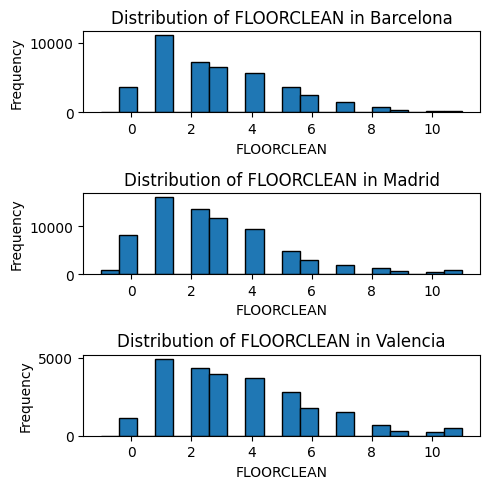

In [235]:
import matplotlib.pyplot as plt

# Crear una figura con tres subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 5))

# Histograma para el dataset de Barcelona
axs[0].hist(df_Barcelona['FLOORCLEAN'].dropna(), bins=20, edgecolor='k')
axs[0].set_title('Distribution of FLOORCLEAN in Barcelona')
axs[0].set_xlabel('FLOORCLEAN')
axs[0].set_ylabel('Frequency')

# Histograma para el dataset de Madrid
axs[1].hist(df_Madrid['FLOORCLEAN'].dropna(), bins=20, edgecolor='k')
axs[1].set_title('Distribution of FLOORCLEAN in Madrid')
axs[1].set_xlabel('FLOORCLEAN')
axs[1].set_ylabel('Frequency')

# Histograma para el dataset de Valencia
axs[2].hist(df_Valencia['FLOORCLEAN'].dropna(), bins=20, edgecolor='k')
axs[2].set_title('Distribution of FLOORCLEAN in Valencia')
axs[2].set_xlabel('FLOORCLEAN')
axs[2].set_ylabel('Frequency')

# Ajustar el layout para que no se superpongan los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


In the histograms you can see a certain asymmetry of the values, therefore the median may not be the best option, on the other hand there is no specific floor that has a much higher trend than the others, therefore the mode is not the same. it would be ideal. We consider that the median can be a good alternative in this case

In [236]:
median_floorclean_barcelona = df_Barcelona['FLOORCLEAN'].median()
df_Barcelona['FLOORCLEAN'].fillna(median_floorclean_barcelona, inplace=True)

median_floorclean_madrid = df_Madrid['FLOORCLEAN'].median()
df_Madrid['FLOORCLEAN'].fillna(median_floorclean_madrid, inplace=True)

median_floorclean_valencia = df_Valencia['FLOORCLEAN'].median()
df_Valencia['FLOORCLEAN'].fillna(median_floorclean_valencia, inplace=True)

**3. Flat Location**

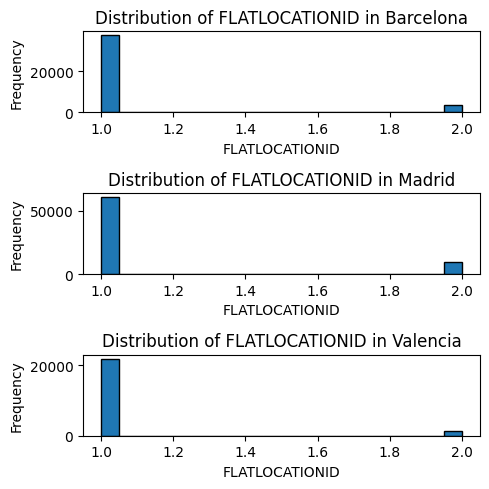

In [237]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(5, 5))

axs[0].hist(df_Barcelona['FLATLOCATIONID'].dropna(), bins=20, edgecolor='k')
axs[0].set_title('Distribution of FLATLOCATIONID in Barcelona')
axs[0].set_xlabel('FLATLOCATIONID')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_Madrid['FLATLOCATIONID'].dropna(), bins=20, edgecolor='k')
axs[1].set_title('Distribution of FLATLOCATIONID in Madrid')
axs[1].set_xlabel('FLATLOCATIONID')
axs[1].set_ylabel('Frequency')

axs[2].hist(df_Valencia['FLATLOCATIONID'].dropna(), bins=20, edgecolor='k')
axs[2].set_title('Distribution of FLATLOCATIONID in Valencia')
axs[2].set_xlabel('FLATLOCATIONID')
axs[2].set_ylabel('Frequency')

plt.tight_layout()

plt.show()


In the three cities, the properties are most commonly exterior (1), therefore we will impute the missing values ​​as exterior. Also we consider apropiate to change the value of a interior apartment to 0, making it more intuitive and as a dummy variable.

In [238]:
df_Barcelona['FLATLOCATIONID'].fillna(1, inplace=True)
df_Barcelona['FLATLOCATIONID'].replace(2, 0, inplace=True)

df_Madrid['FLATLOCATIONID'].fillna(1, inplace=True)
df_Madrid['FLATLOCATIONID'].replace(2, 0, inplace=True)

df_Valencia['FLATLOCATIONID'].fillna(1, inplace=True)
df_Valencia['FLATLOCATIONID'].replace(2, 0, inplace=True)


**4. Cadastral Quality ID**

In [239]:
mean_CAD_Madrid = round(df_Madrid['CADASTRALQUALITYID'].mean())
df_Madrid['CADASTRALQUALITYID'].fillna(mean_CAD_Madrid, inplace=True)

### Outliers and unbalanced data

To review problems related to outliers and/or unbalanced data, we begin by creating the histograms for all the numerical variables and second, the boxplots.

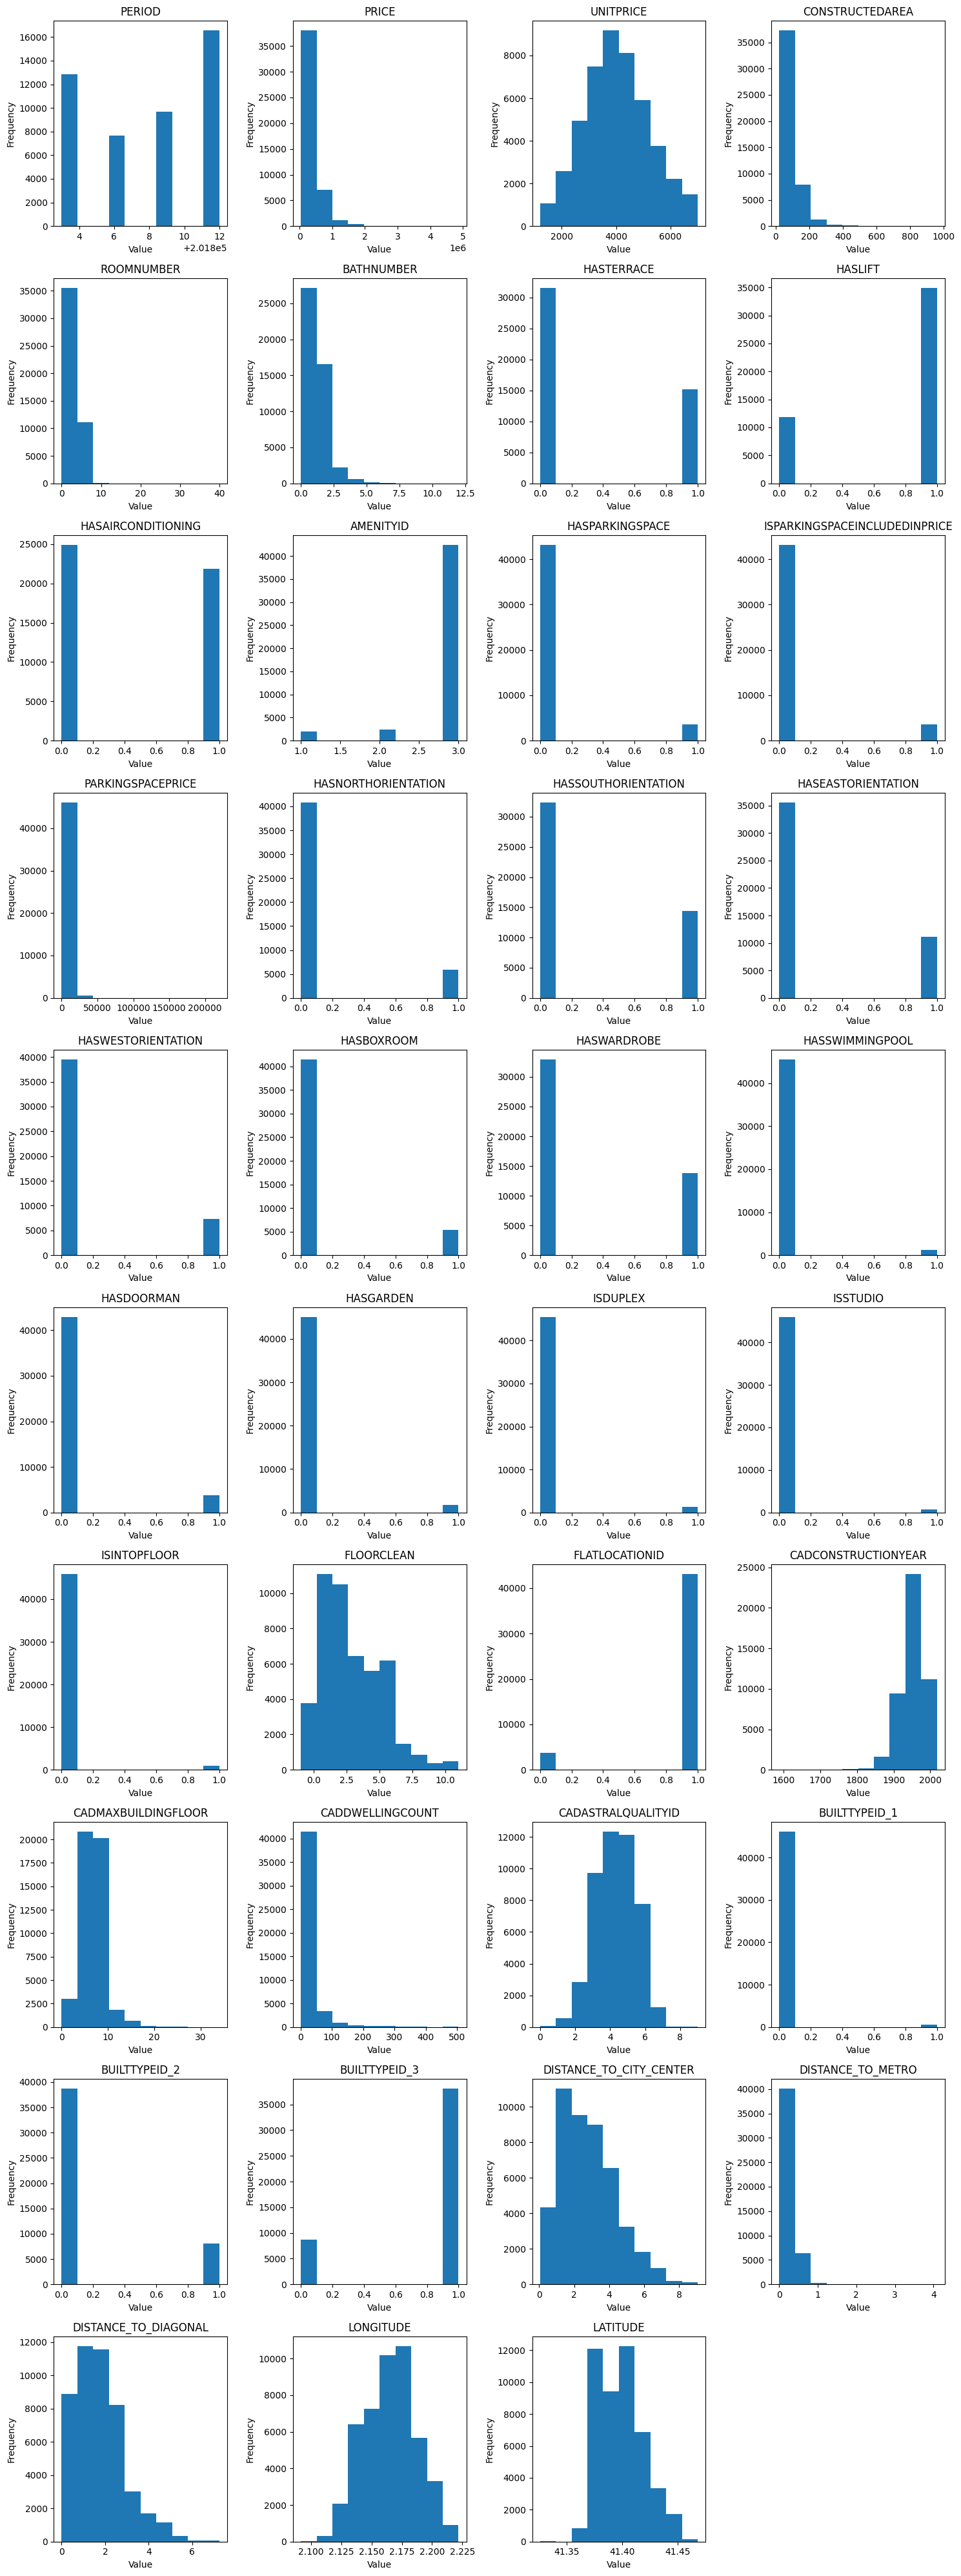

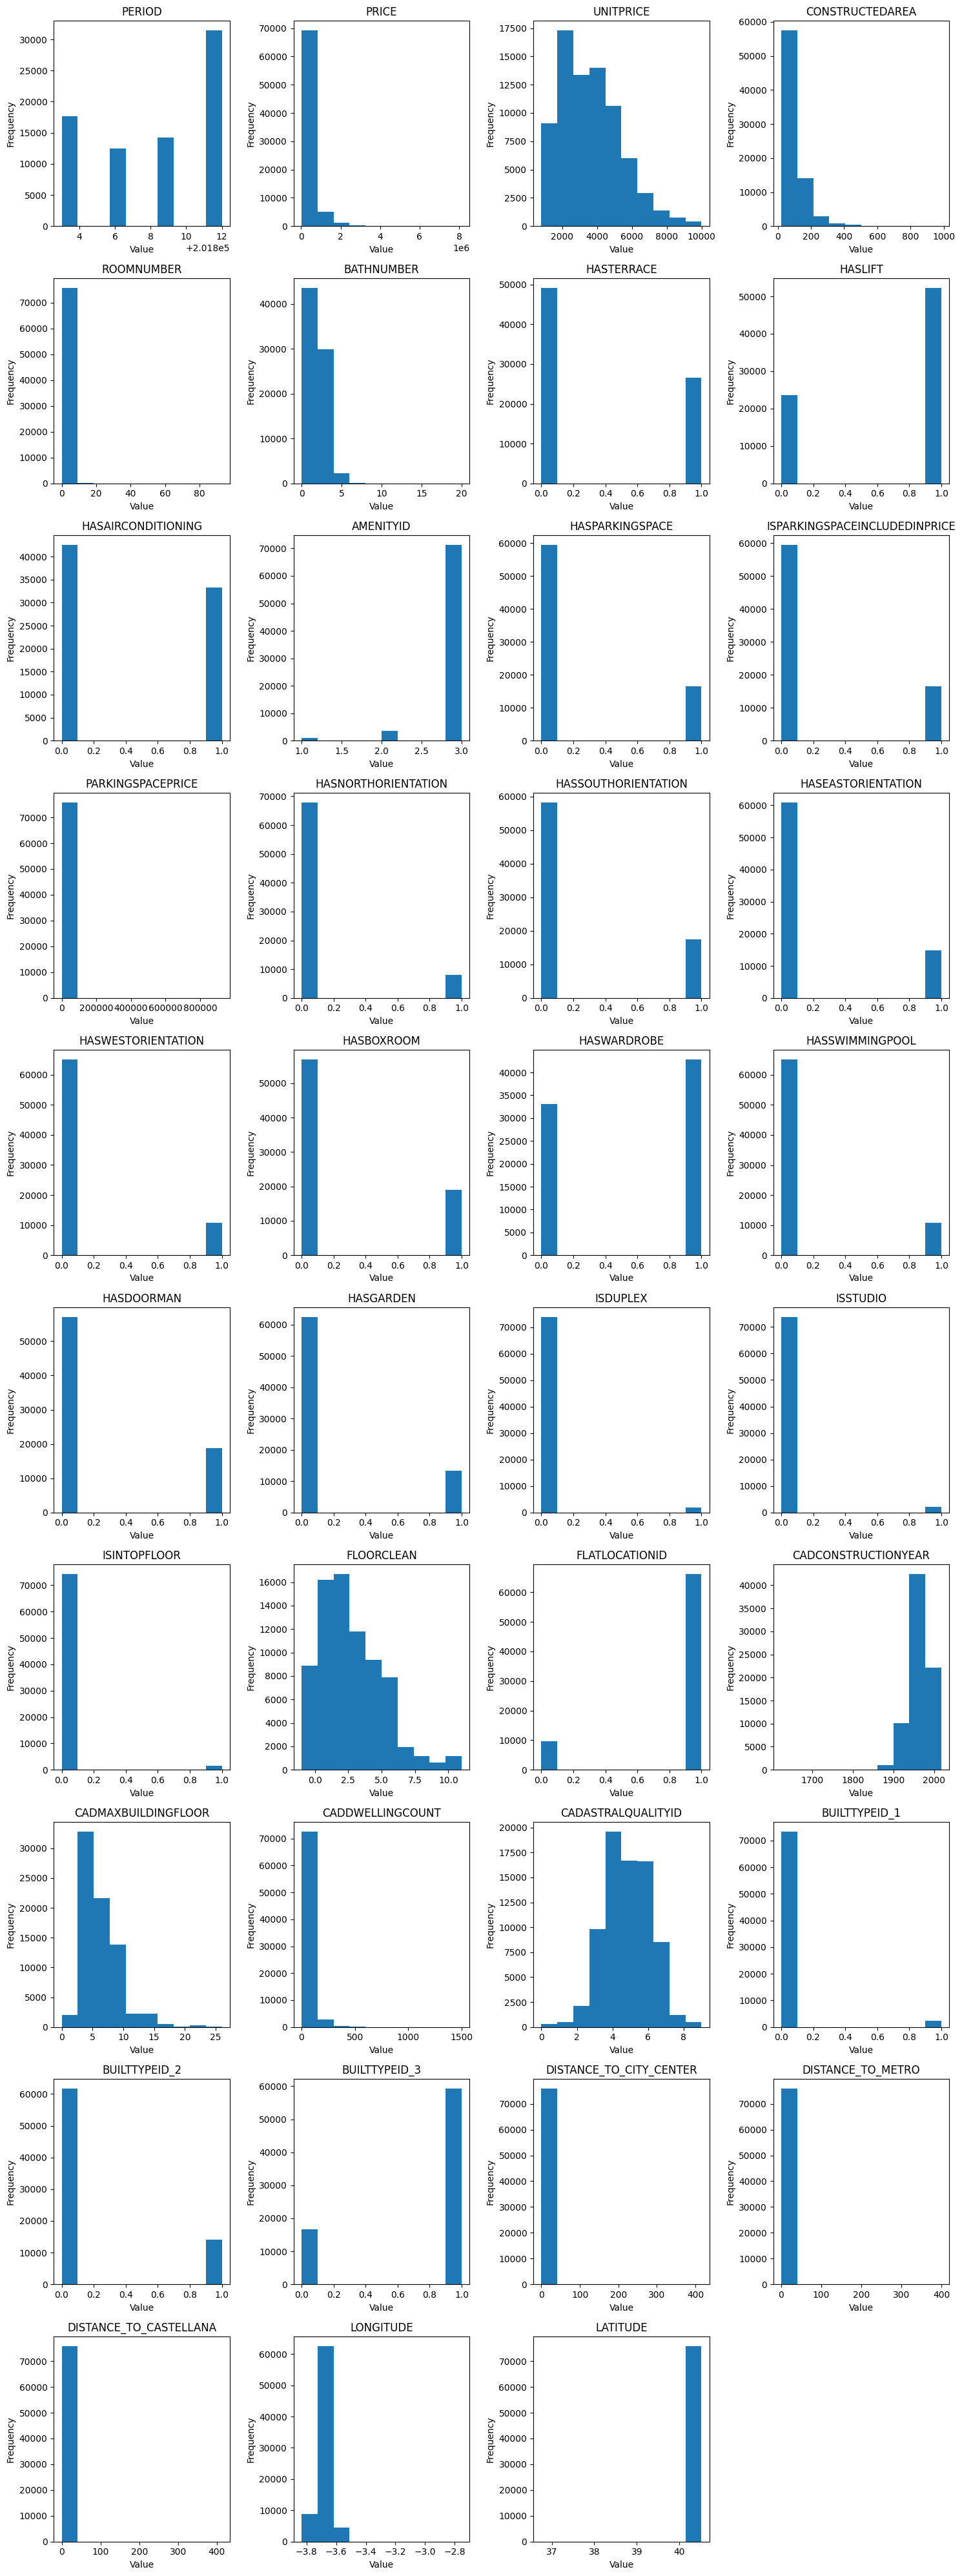

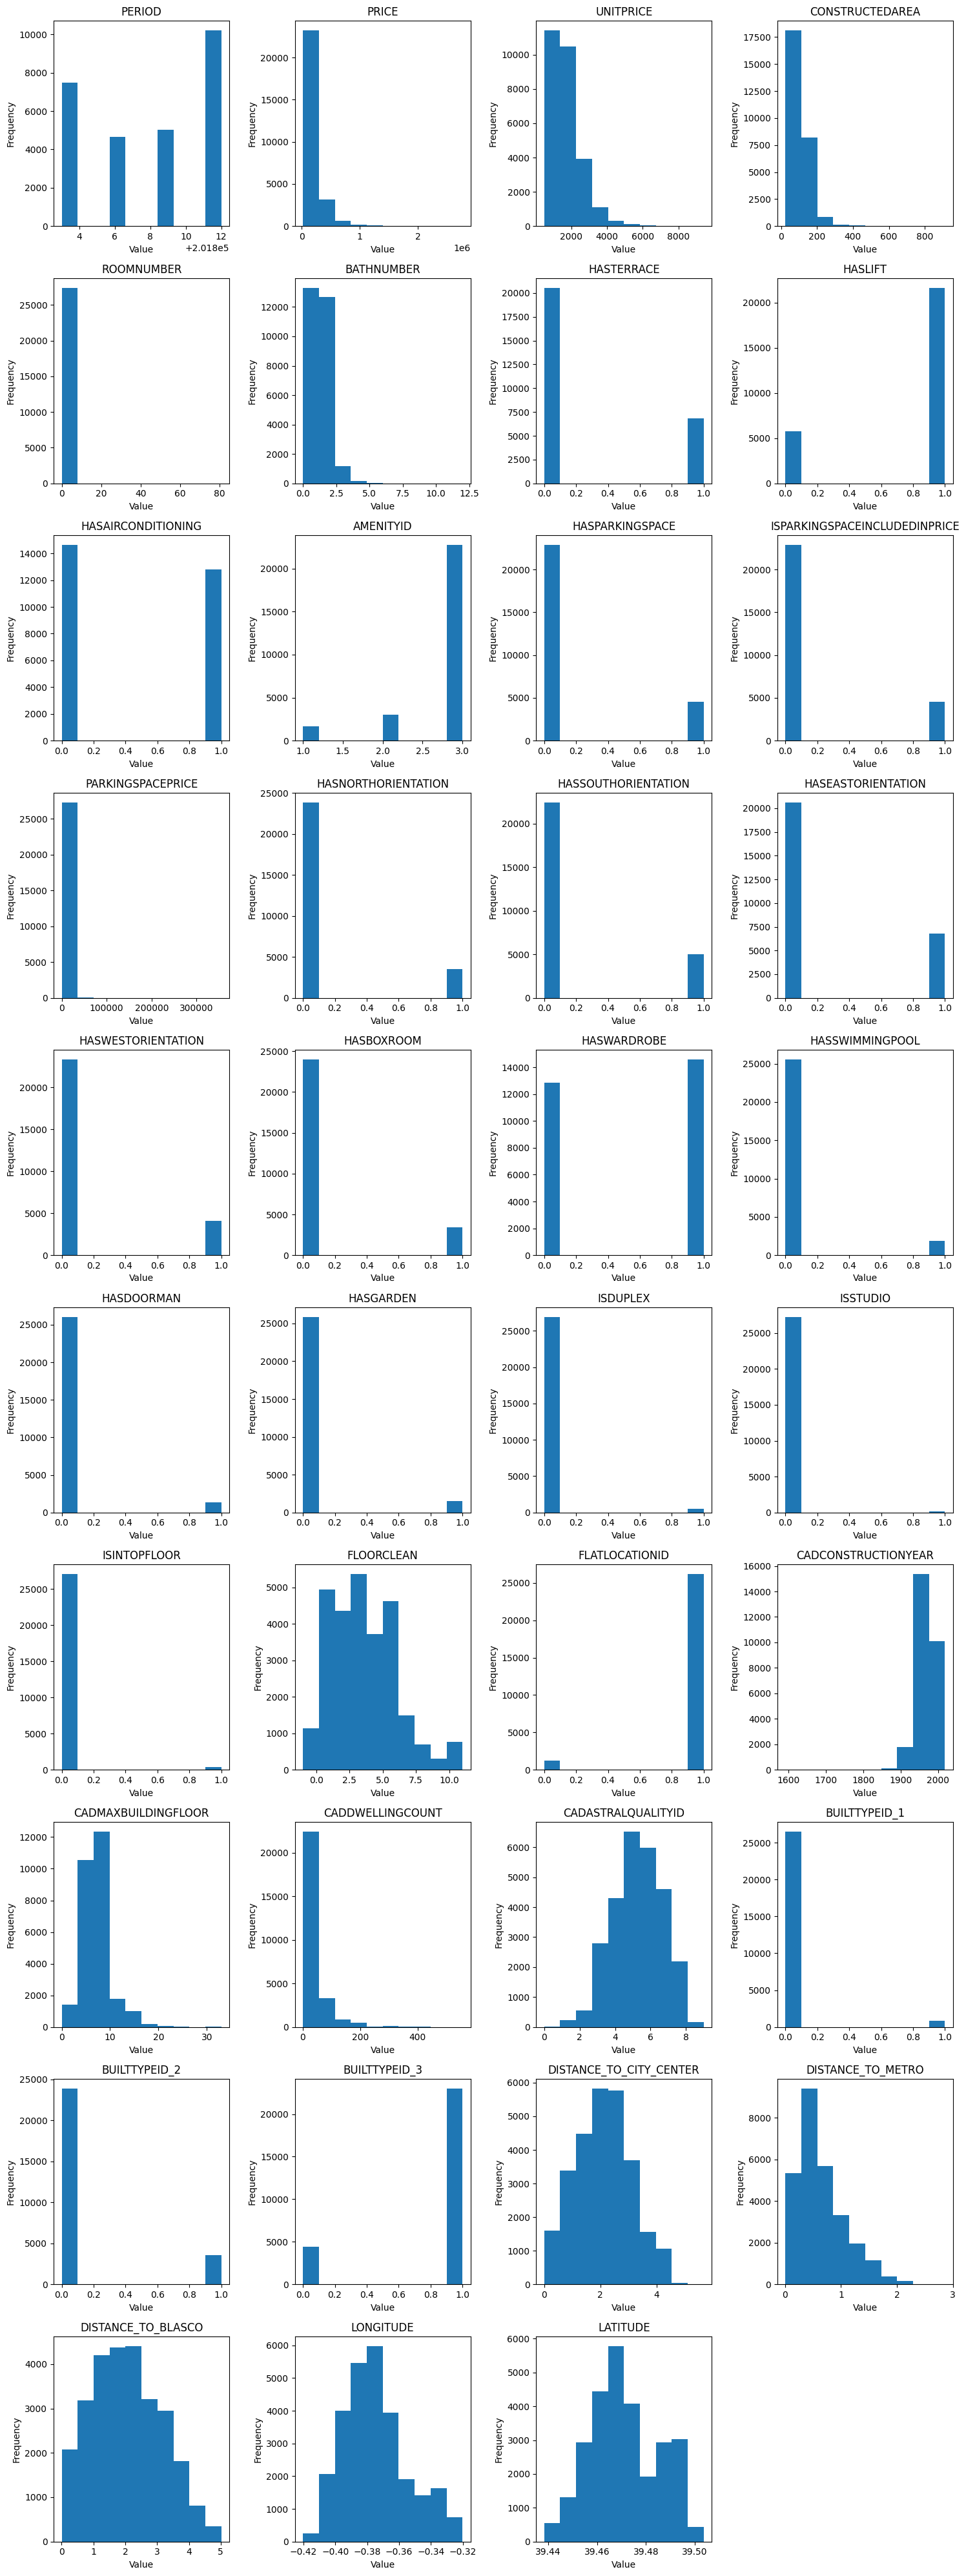

In [240]:
import pandas as pd


def create_histogram(df, bins=10, ncols=4):
    numeric_cols = df.select_dtypes(include='number').columns
    nrows = math.ceil(len(numeric_cols) / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        df[col].plot.hist(bins=bins, ax=ax)
        ax.set_title(col)
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

create_histogram(df_Barcelona)

create_histogram(df_Madrid)

create_histogram(df_Valencia)


As we can see in some of the boolean variables there are somo cases of debalancing, it make sense that most of the apartment have elevator or that they don't have parking space, so we will include this variables in the model by the moment an see how it performs.

We can also see that our initial indication that the Parking Price variable did not have much information may be correct since when looking at the histogram the vast majority of its values ​​are equal to 1, which is why we decided to eliminate said variable since we consider that it does not work. to be significant for our model.

On the other hand, we also observe from the histogram and the rest of the EDA that the variables HASPARKINGSPACE and ISPARKINGSPACEINCLUDED have the same value, so we can eliminate one and keep the other

In [241]:
df_Barcelona = df_Barcelona.drop(columns=['PARKINGSPACEPRICE', 'ISPARKINGSPACEINCLUDEDINPRICE'])
df_Madrid = df_Madrid.drop(columns=['PARKINGSPACEPRICE', 'ISPARKINGSPACEINCLUDEDINPRICE'])
df_Valencia = df_Valencia.drop(columns=['PARKINGSPACEPRICE', 'ISPARKINGSPACEINCLUDEDINPRICE'])

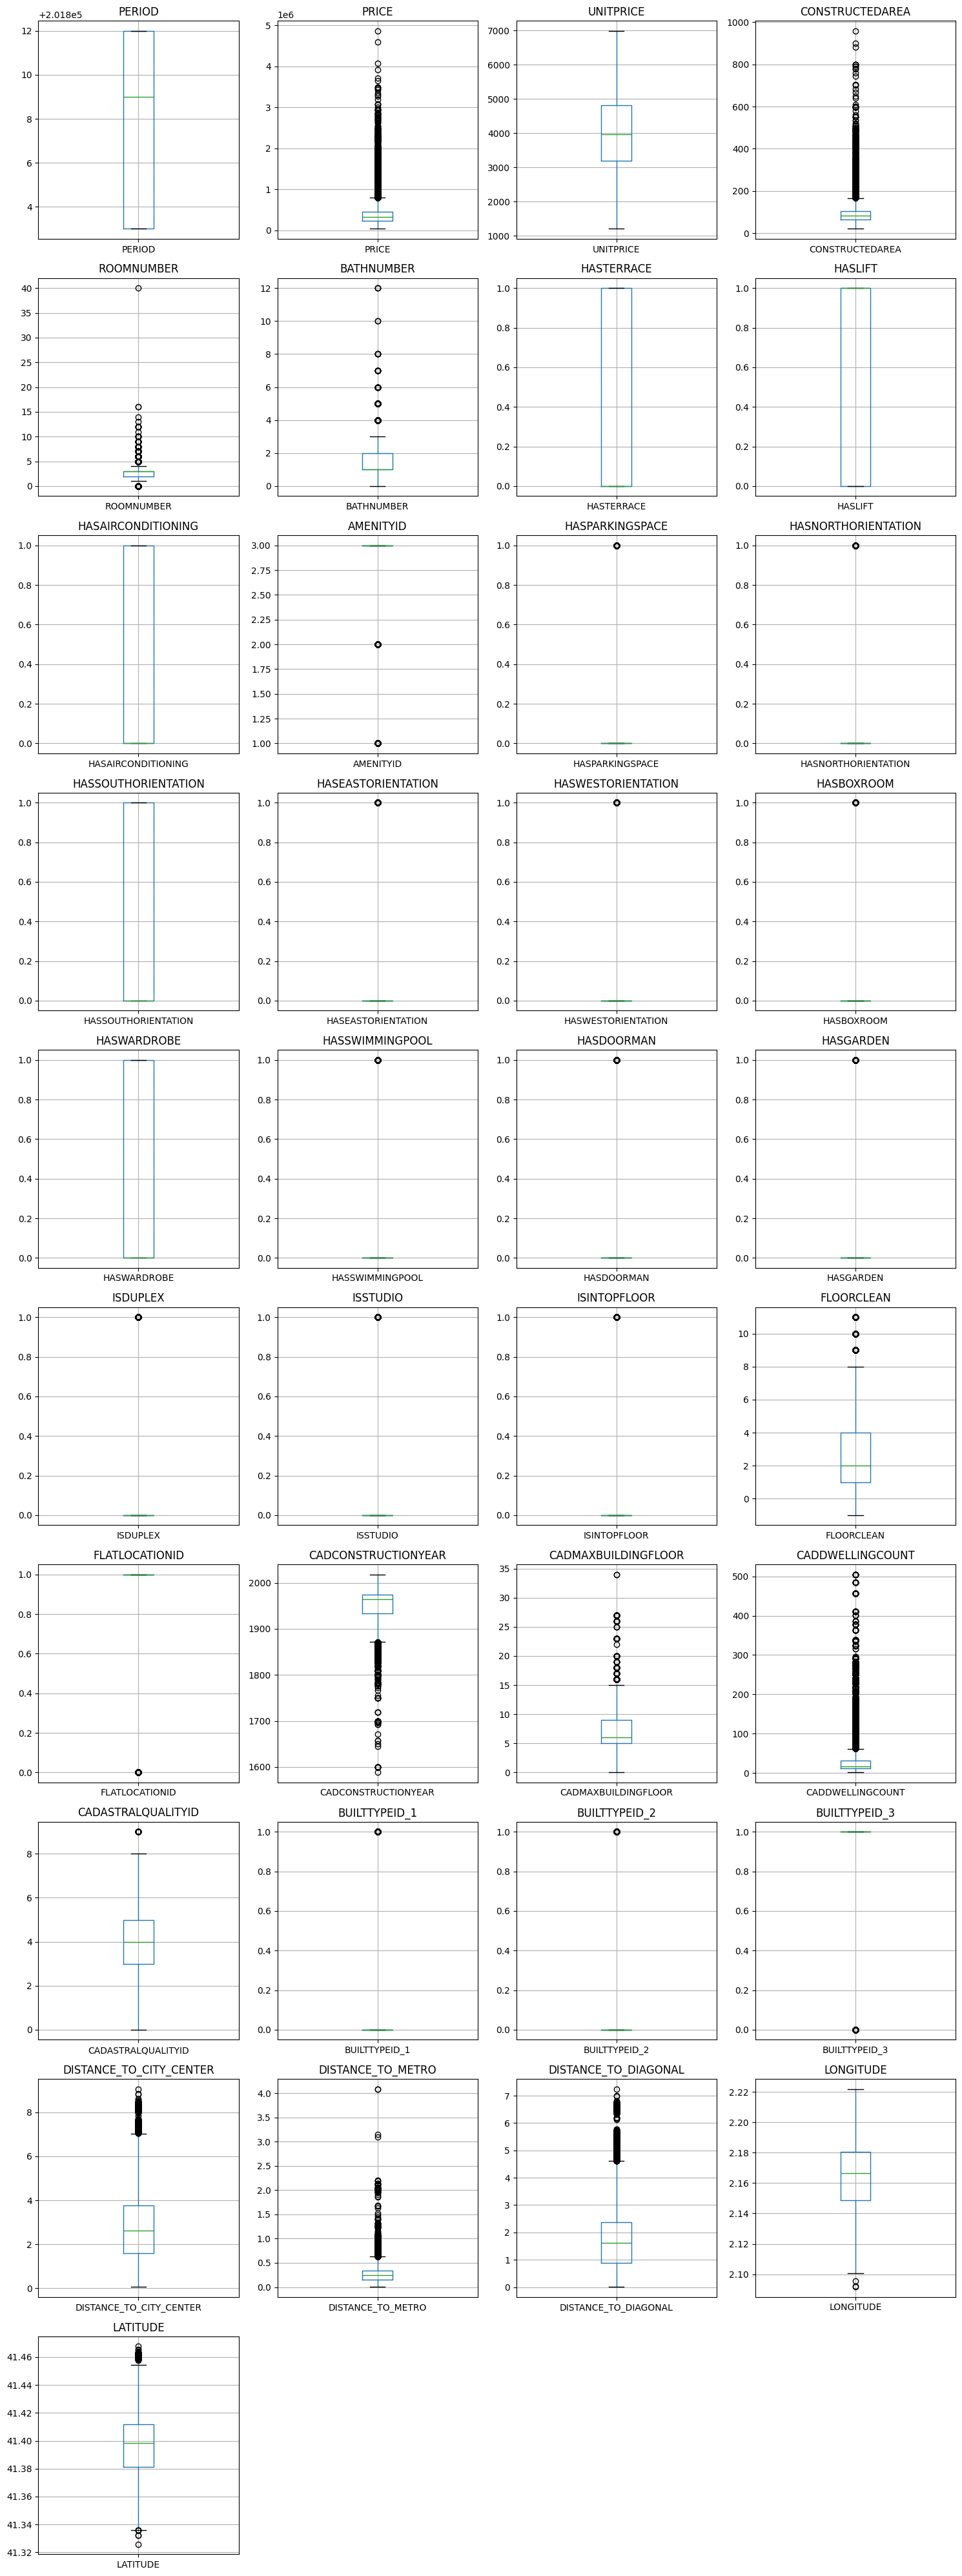

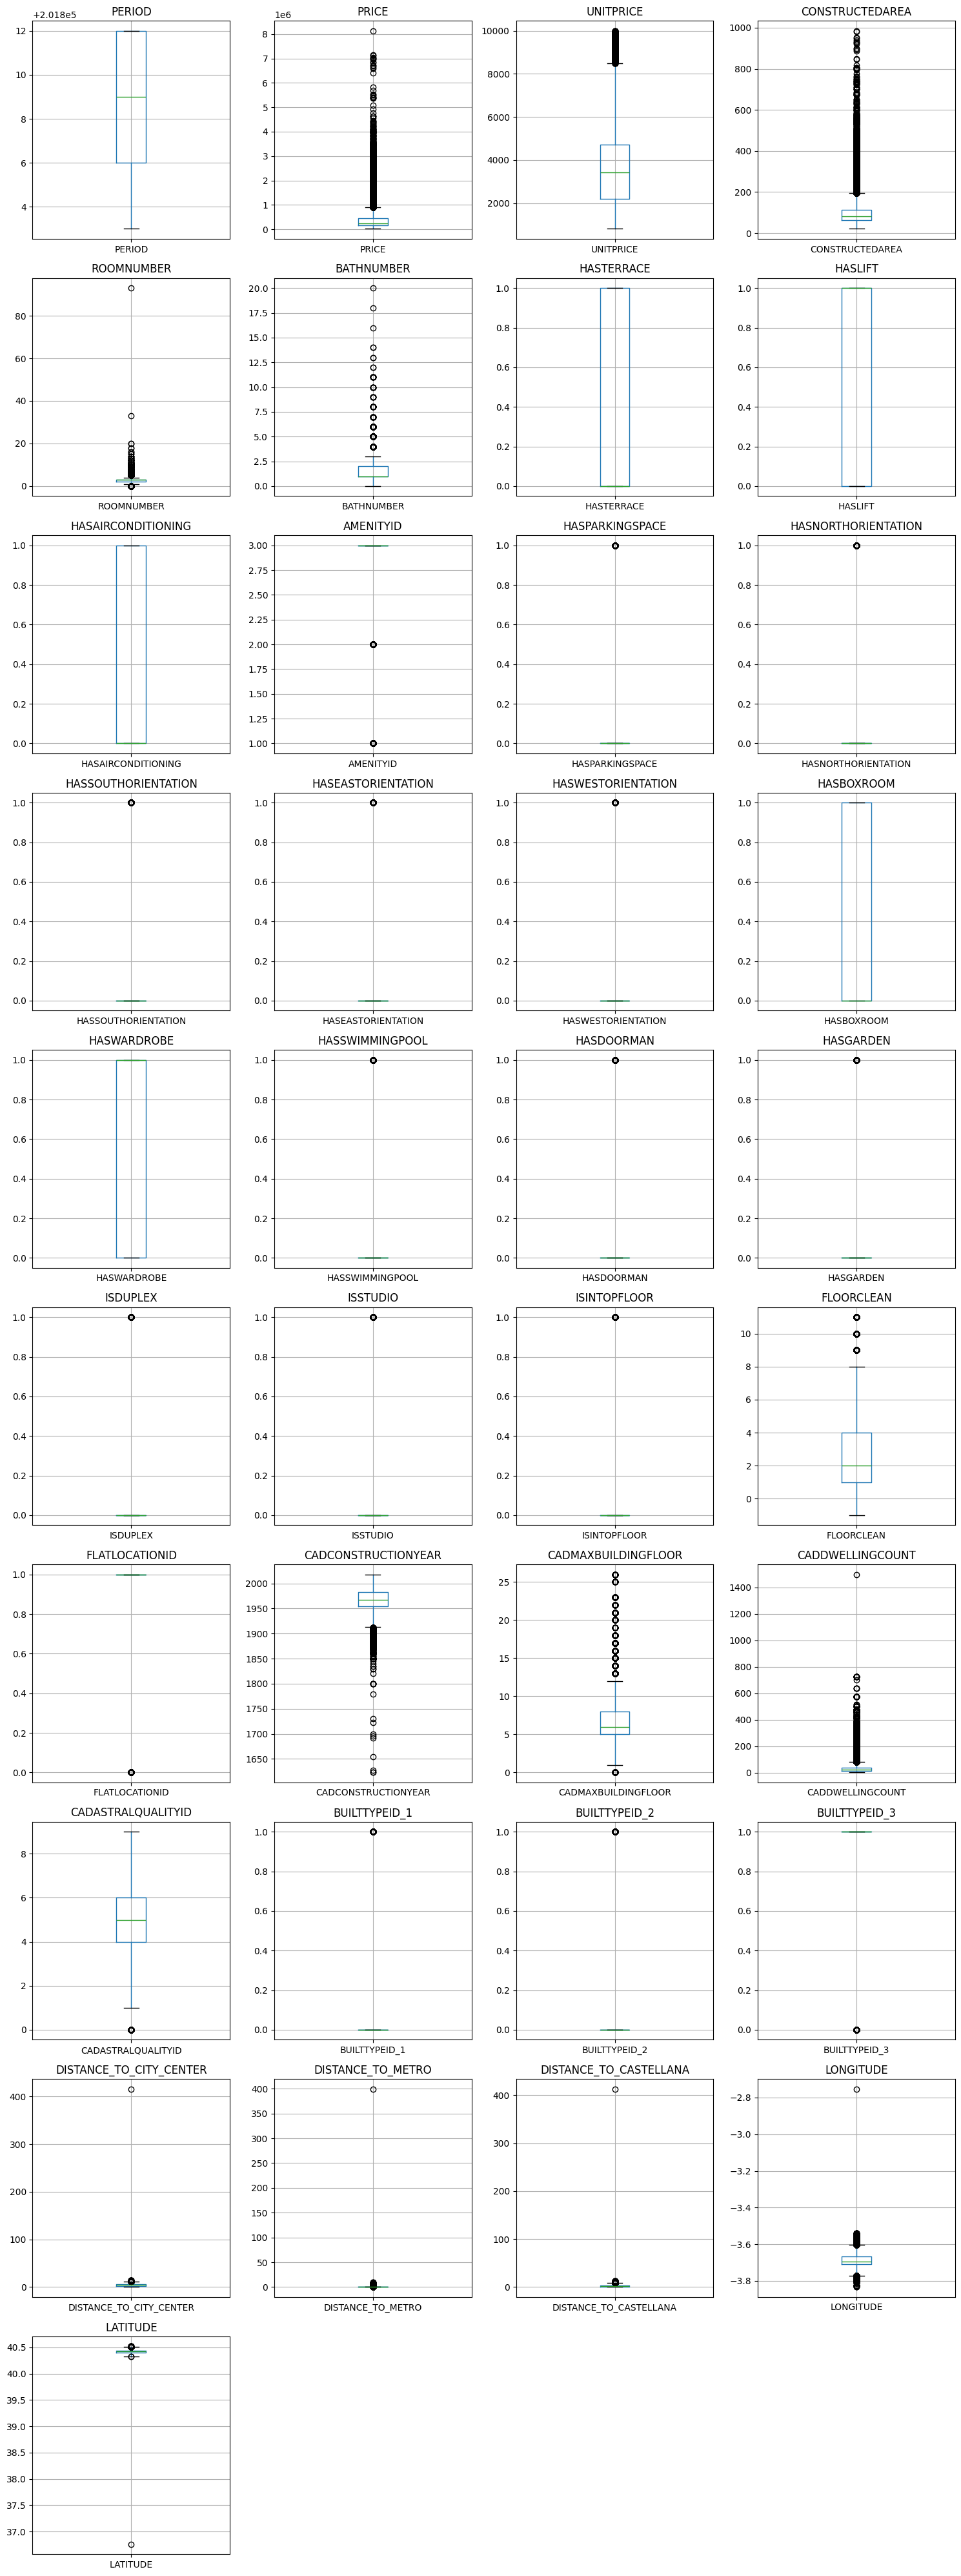

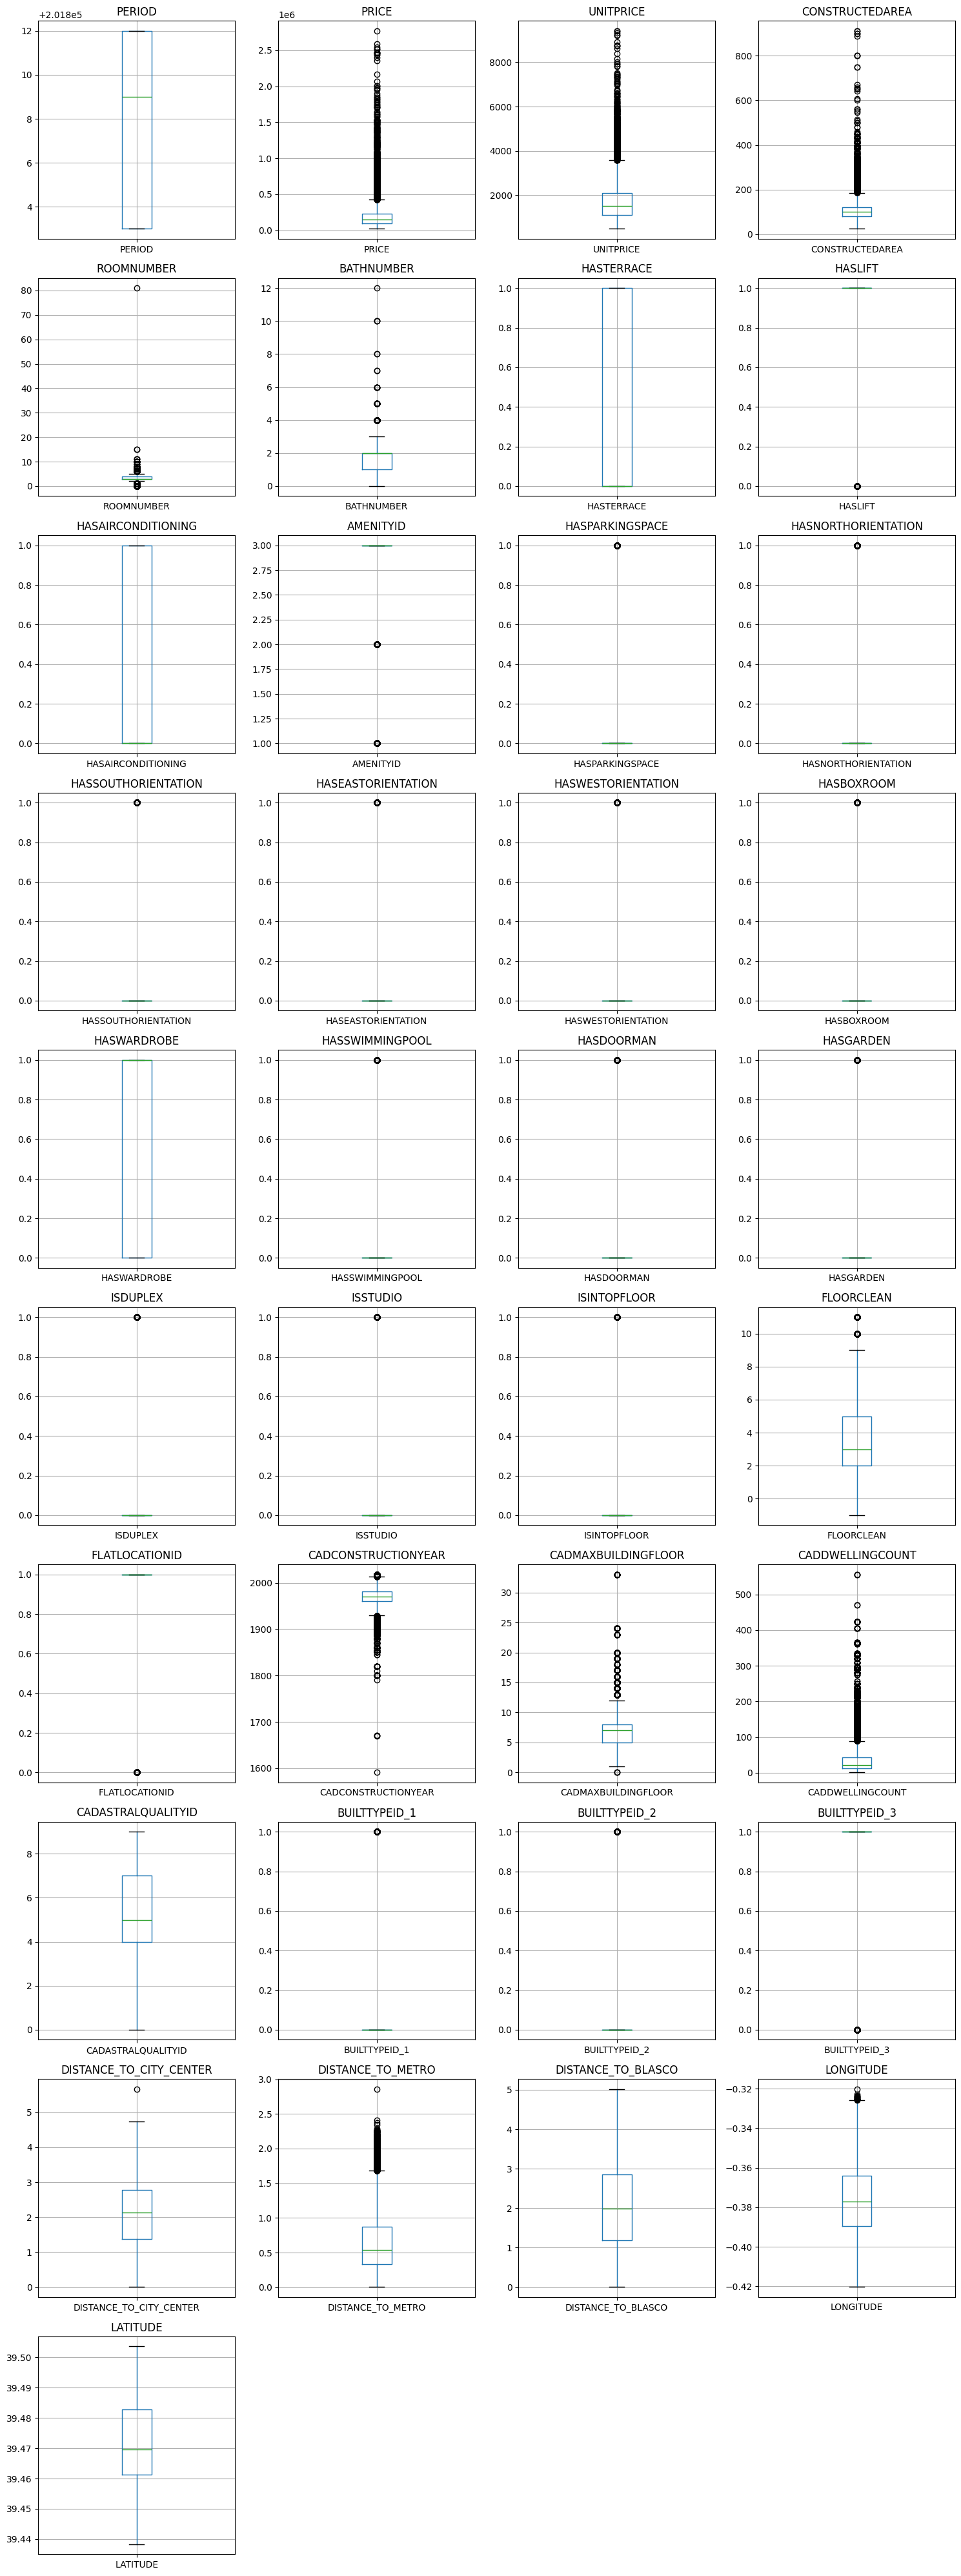

In [242]:
import matplotlib.pyplot as plt
import math

def create_boxplots(df, ncols=4):
    numeric_cols = df.select_dtypes(include='number').columns
    nrows = math.ceil(len(numeric_cols) / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        df.boxplot(column=col, ax=ax)
        ax.set_title(col)

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

create_boxplots(df_Barcelona)

create_boxplots(df_Madrid)

create_boxplots(df_Valencia)


Taking the histograms and boxplots as reference, we can see that we do indeed have variables with values ​​that are quite out of the conventional, such as properties with prices above 4M and more than 900 squared meters. Seeing the different variables of these properties, some could make sense due to the fact that the number of meters can be an explanatory variable of the price and in that case it would make sense to leave it, however, when testing some initial and simple models, leaving the outliers effectively affect the prediction ability. Therefore, we decided to make the following limitations on the ranges of the variables to see if the prediction capacity of our model improves.

- Price, Squared Meters, Number of Rooms and Number of Bathrooms: We will limit the values ​​to the 99th percentile of each variable, since we consider that the values ​​above this percentile are outliers that can affect the prediction capacity of our model.

In [243]:
#cambiar
def remove_upper_percentile_outliers(df, columns, percentile=99):
    for col in columns:
        upper_bound = df[col].quantile(percentile / 100)
        df = df[df[col] <= upper_bound]
    return df

# Variables a considerar
columns_to_process = ['PRICE','CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER']

# Aplicar la función a cada dataset
df_Barcelona = remove_upper_percentile_outliers(df_Barcelona, columns_to_process)
df_Madrid = remove_upper_percentile_outliers(df_Madrid, columns_to_process)
df_Valencia = remove_upper_percentile_outliers(df_Valencia, columns_to_process)


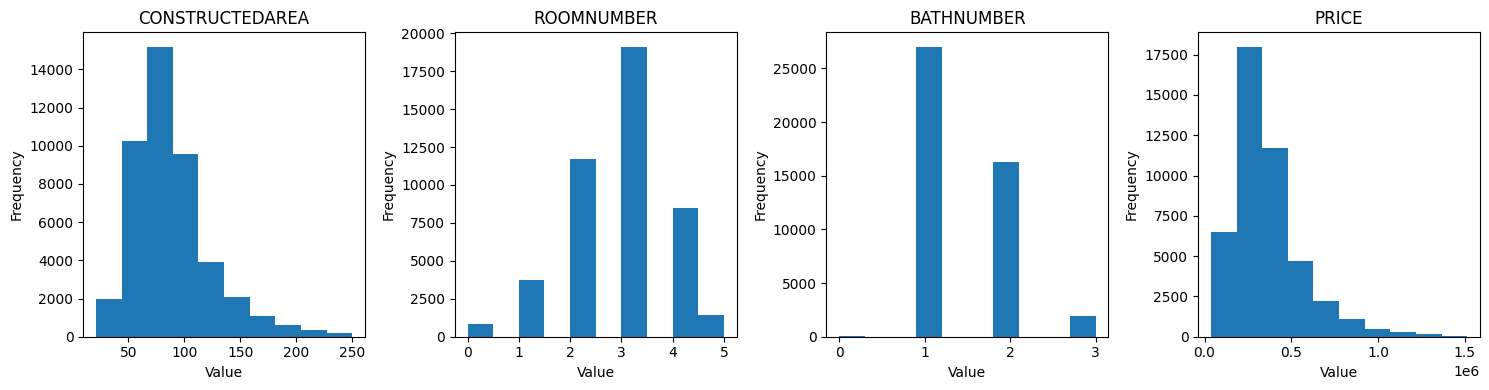

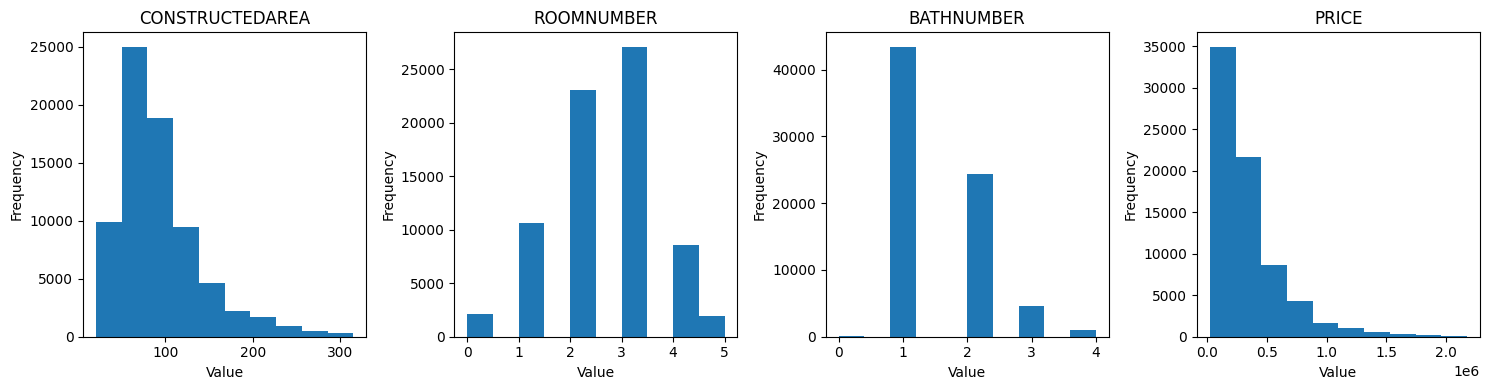

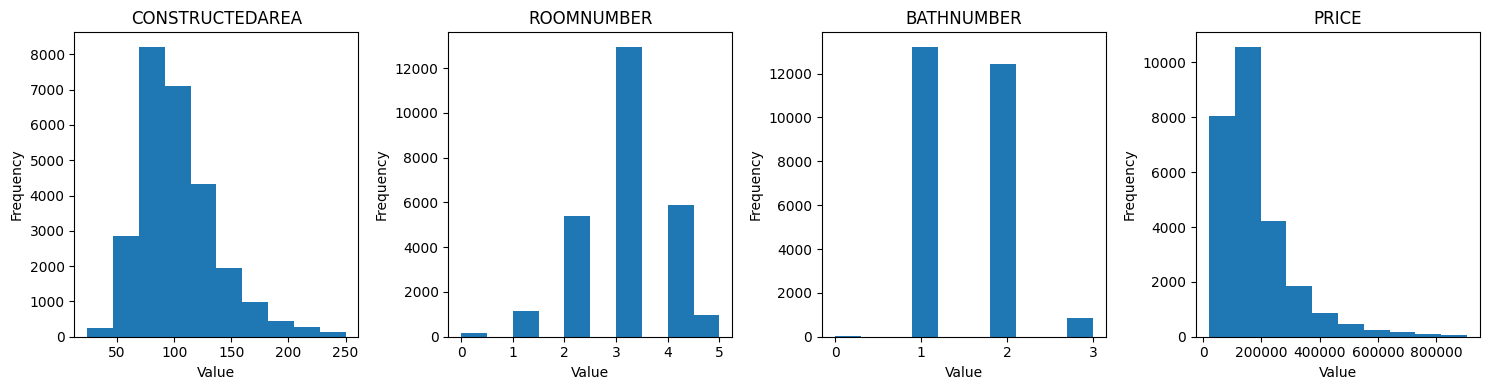

In [244]:
df_Barcelona_subset = df_Barcelona[['CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'PRICE']]
df_Madrid_subset = df_Madrid[['CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'PRICE']]
df_Valencia_subset = df_Valencia[['CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'PRICE']]

# Crear histogramas para cada dataset filtrado
create_histogram(df_Barcelona_subset)
create_histogram(df_Madrid_subset)
create_histogram(df_Valencia_subset)

By only taking the 99th percentile of the data we can see that there is a significant change in the skewness of the data, in the same way there is still a long right tail, we will run the model with this information and if necessary it will be adjusted later.

As for the unbalanced variables, it will be maintained for the moment to run an initial model, in case it may be affecting the model, some method will be used to treat the imbalance.

## Data Preparation

### Encoding the Categorical Variables

As we can see de variable 'PERIOD' is a categorical variable knowing that is a numerical representation of the months, in this case we decided to encode it as a categorical variable using the one hot encoding method.

In [245]:
df_Barcelona = pd.get_dummies(df_Barcelona, columns=['PERIOD'], prefix='MONTH')
df_Madrid = pd.get_dummies(df_Madrid, columns=['PERIOD'], prefix='MONTH')
df_Valencia = pd.get_dummies(df_Valencia, columns=['PERIOD'], prefix='MONTH')

### Creating new Geo Columns

**Create Column Neighbourhood**

In [246]:
barcelona_pois = pd.read_csv('Barcelona_pois.csv', sep=",")
barcelona_pol = pd.read_csv('Barcelona_pol.csv', sep=",")
madrid_pois = pd.read_csv('Madrid_pois.csv', sep=",")
madrid_pol = pd.read_csv('Madrid_pol.csv', sep=",")
valencia_pois = pd.read_csv('Valencia_pois.csv', sep=",")
valencia_pol = pd.read_csv('Valencia_pol.csv', sep=",")

**Create a List of tuples containing: (name: string, pol: Polygon) for each neighbourhood in the pol dataset**

In [247]:
def geometry_to_poly(s):
    long, lat = s.split('|4', 1)
    lat = '4' + lat
    long = long.split('|')
    lat = lat.split('|')
    coordinates = []
    for i in range(0,len(long)):
        coordinates.append((float(long[i]), float(lat[i])))
    return Polygon(coordinates)

def geometry_to_poly_val(s):
    long, lat = s.split('|3', 1)
    lat = '3' + lat
    long = long.split('|')
    lat = lat.split('|')
    coordinates = []
    for i in range(0,len(long)):
        coordinates.append((float(long[i]), float(lat[i])))
    return Polygon(coordinates)


In [248]:
barca_pol_list = []
madrid_pol_list = []
val_pol_list = []
for row in barcelona_pol.itertuples(index=False):
    barca_pol_list.append((row.LOCATIONNAME, geometry_to_poly(row.geometry)))
for row in madrid_pol.itertuples(index=False):
    madrid_pol_list.append((row.LOCATIONNAME, geometry_to_poly(row.geometry)))
for row in valencia_pol.itertuples(index=False):
    val_pol_list.append((row.LOCATIONNAME, geometry_to_poly_val(row.geometry)))

**Create Function that returns form Sale Geometry the name of the neighbourhood**

In [249]:
def geometry_to_neighbourhood(x, pol_list):
    long, lat = map(float, x.split('|'))
    point = Point(long, lat)
    for name, pol in pol_list:
        if pol.contains(point):
            return name

**Apply to Sale Dataset**

In [250]:
df_Barcelona['neighbourhood'] = df_Barcelona['geometry'].apply(lambda x: geometry_to_neighbourhood(x, barca_pol_list))
df_Madrid['neighbourhood'] = df_Madrid['geometry'].apply(lambda x: geometry_to_neighbourhood(x, madrid_pol_list))
df_Valencia['neighbourhood'] = df_Valencia['geometry'].apply(lambda x: geometry_to_neighbourhood(x, val_pol_list))

In [251]:
df_Barcelona

ASSETID      PRICE    UNITPRICE  CONSTRUCTEDAREA  \
0      A11898131848556022319   323000.0  3845.238095               84   
4      A12978912200216838006   434000.0  3909.909910              111   
12       A562616855841313407  1109000.0  5776.041667              192   
14      A2669047332835598629   491000.0  5010.204082               98   
18     A17484290359262902262   410000.0  4823.529412               85   
...                      ...        ...          ...              ...   
61481   A8236213040595627286   173000.0  3145.454545               55   
61482   A7326977391536869553   417000.0  6415.384615               65   
61483   A4195884399546751335   447000.0  5587.500000               80   
61484   A8911187592173062363   281000.0  4929.824561               57   
61485   A7298014268035114586   194000.0  2519.480519               77   

       ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  \
0               4           1           1        1                   1   
4               4           2           1        1                   1   
12              3           3           1        1                   1   
14              3           2           0        1                   1   
18              3           2           0        1                   1   
...           ...         ...         ...      ...                 ...   
61481           2           1           0        1                   0   
61482           1           1           1        1                   1   
61483           1           1           1        1                   1   
61484           1           1           0        1                   1   
61485           3           1           0        1                   1   

       AMENITYID  HASPARKINGSPACE  HASNORTHORIENTATION  HASSOUTHORIENTATION  \
0              3                0                    0                    0   
4              3                0                    0                    0   
12             2                0                    0                    1   
14             3                0                    0                    0   
18             3                0                    0                    0   
...          ...              ...                  ...                  ...   
61481          3                0                    0                    0   
61482          3                0                    0                    1   
61483          3                1                    0                    0   
61484          3                1                    0                    0   
61485          3                0                    1                    1   

       HASEASTORIENTATION  HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  \
0                       0                   0           0            0   
4                       0                   0           0            0   
12                      0                   0           0            1   
14                      0                   0           0            0   
18                      1                   0           0            0   
...                   ...                 ...         ...          ...   
61481                   0                   1           0            0   
61482                   0                   0           1            1   
61483                   0                   0           1            1   
61484                   0                   1           1            1   
61485                   0                   1           0            1   

       HASSWIMMINGPOOL  HASDOORMAN  HASGARDEN  ISDUPLEX  ISSTUDIO  \
0                    0           0          0         0         0   
4                    0           0          0         0         0   
12                   0           0          0         0         0   
14                   0           0          0         0         0   
18                   0           1          0         0         0   
...

**Create Column metro_within_500m**

Number of metro stations within 500 meters

**Create list of metro coordinates**

In [252]:
barcelona_metros = barcelona_pois[barcelona_pois["POI"] == 'metro']
madrid_metros = madrid_pois[madrid_pois["POI"] == 'metro']
valencia_metros = valencia_pois[valencia_pois["POI"] == 'metro']

In [253]:
barca_metroCoord_list = []
madrid_metroCoord_list = []
val_metroCoord_list = []
for row in barcelona_metros.itertuples(index=False):
    barca_metroCoord_list.append((row.Lon, row.Lat))
for row in madrid_metros.itertuples(index=False):
    madrid_metroCoord_list.append((row.Lon, row.Lat))
for row in valencia_metros.itertuples(index=False):
    val_metroCoord_list.append((row.Lon, row.Lat))

**Create Function for Haverstine distance in meters**

In [254]:
def haversine( lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = radians(lon1), radians(lat1), radians(lon2), radians(lat2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 * 1000
    return c * r

**Create Function geometry_to_numberMetros**

In [255]:
def geometry_to_numberMetros(x, metroCoord_list):
    long, lat = map(float, x.split('|'))
    count = 0
    for coord in metroCoord_list:
        if haversine(coord[0], coord[1], long,lat) < 500:
            count = count + 1
    return count

**Apply to Sale Dataset**

In [256]:
df_Barcelona['metro_within_500'] = df_Barcelona['geometry'].apply(lambda x: geometry_to_numberMetros(x, barca_metroCoord_list))
df_Madrid['metro_within_500'] = df_Madrid['geometry'].apply(lambda x: geometry_to_numberMetros(x, madrid_metroCoord_list))
df_Valencia['metro_within_500'] = df_Valencia['geometry'].apply(lambda x: geometry_to_numberMetros(x, val_metroCoord_list))

In [257]:
df_Barcelona.columns

Index(['ASSETID', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER',
       'BATHNUMBER', 'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING',
       'AMENITYID', 'HASPARKINGSPACE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR', 'FLOORCLEAN',
       'FLATLOCATIONID', 'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR',
       'CADDWELLINGCOUNT', 'CADASTRALQUALITYID', 'BUILTTYPEID_1',
       'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTANCE_TO_CITY_CENTER',
       'DISTANCE_TO_METRO', 'DISTANCE_TO_DIAGONAL', 'LONGITUDE', 'LATITUDE',
       'geometry', 'MONTH_201803', 'MONTH_201806', 'MONTH_201809',
       'MONTH_201812', 'neighbourhood', 'metro_within_500'],
      dtype='object')

In [258]:
df_Barcelona

ASSETID      PRICE    UNITPRICE  CONSTRUCTEDAREA  \
0      A11898131848556022319   323000.0  3845.238095               84   
4      A12978912200216838006   434000.0  3909.909910              111   
12       A562616855841313407  1109000.0  5776.041667              192   
14      A2669047332835598629   491000.0  5010.204082               98   
18     A17484290359262902262   410000.0  4823.529412               85   
...                      ...        ...          ...              ...   
61481   A8236213040595627286   173000.0  3145.454545               55   
61482   A7326977391536869553   417000.0  6415.384615               65   
61483   A4195884399546751335   447000.0  5587.500000               80   
61484   A8911187592173062363   281000.0  4929.824561               57   
61485   A7298014268035114586   194000.0  2519.480519               77   

       ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  \
0               4           1           1        1                   1   
4               4           2           1        1                   1   
12              3           3           1        1                   1   
14              3           2           0        1                   1   
18              3           2           0        1                   1   
...           ...         ...         ...      ...                 ...   
61481           2           1           0        1                   0   
61482           1           1           1        1                   1   
61483           1           1           1        1                   1   
61484           1           1           0        1                   1   
61485           3           1           0        1                   1   

       AMENITYID  HASPARKINGSPACE  HASNORTHORIENTATION  HASSOUTHORIENTATION  \
0              3                0                    0                    0   
4              3                0                    0                    0   
12             2                0                    0                    1   
14             3                0                    0                    0   
18             3                0                    0                    0   
...          ...              ...                  ...                  ...   
61481          3                0                    0                    0   
61482          3                0                    0                    1   
61483          3                1                    0                    0   
61484          3                1                    0                    0   
61485          3                0                    1                    1   

       HASEASTORIENTATION  HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  \
0                       0                   0           0            0   
4                       0                   0           0            0   
12                      0                   0           0            1   
14                      0                   0           0            0   
18                      1                   0           0            0   
...                   ...                 ...         ...          ...   
61481                   0                   1           0            0   
61482                   0                   0           1            1   
61483                   0                   0           1            1   
61484                   0                   1           1            1   
61485                   0                   1           0            1   

       HASSWIMMINGPOOL  HASDOORMAN  HASGARDEN  ISDUPLEX  ISSTUDIO  \
0                    0           0          0         0         0   
4                    0           0          0         0         0   
12                   0           0          0         0         0   
14                   0           0          0         0         0   
18                   0           1          0         0         0   
...

In [259]:
df_Barcelona.head()

ASSETID      PRICE    UNITPRICE  CONSTRUCTEDAREA  \
0   A11898131848556022319   323000.0  3845.238095               84   
4   A12978912200216838006   434000.0  3909.909910              111   
12    A562616855841313407  1109000.0  5776.041667              192   
14   A2669047332835598629   491000.0  5010.204082               98   
18  A17484290359262902262   410000.0  4823.529412               85   

    ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  \
0            4           1           1        1                   1   
4            4           2           1        1                   1   
12           3           3           1        1                   1   
14           3           2           0        1                   1   
18           3           2           0        1                   1   

    AMENITYID  HASPARKINGSPACE  HASNORTHORIENTATION  HASSOUTHORIENTATION  \
0           3                0                    0                    0   
4           3                0                    0                    0   
12          2                0                    0                    1   
14          3                0                    0                    0   
18          3                0                    0                    0   

    HASEASTORIENTATION  HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  \
0                    0                   0           0            0   
4                    0                   0           0            0   
12                   0                   0           0            1   
14                   0                   0           0            0   
18                   1                   0           0            0   

    HASSWIMMINGPOOL  HASDOORMAN  HASGARDEN  ISDUPLEX  ISSTUDIO  ISINTOPFLOOR  \
0                 0           0          0         0         0             0   
4                 0           0          0         0         0             0   
12                0           0          0         0         0             0   
14                0           0          0         0         0             0   
18                0           1          0         0         0             0   

    FLOORCLEAN  FLATLOCATIONID  CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  \
0          4.0             1.0                 1972                    9   
4          2.0             1.0                 1970                    8   
12         0.0             1.0                 1980                    4   
14         1.0             1.0                 1972                   10   
18         1.0             1.0                 1970                   10   

    CADDWELLINGCOUNT  CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  \
0                 13                   4              0              0   
4                 60                   2              0              0   
12                10                   3              0              0   
14                32                   3              0              0   
18                32                   3              0              0   

    BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
0               1                 1.876290           0.354004   
4               1                 2.333066           0.101568   
12              1                 0.574150           0.196765   
14              1                 2.177991           0.076963   
18              1                 2.262351           0.148700   

    DISTANCE_TO_DIAGONAL  LONGITUDE   LATITUDE  \
0               1.475264   2.149566  41.380027   
4               1.200265   2.143230  41.381076   
12              0.713400   2.167898  41.391870   
14              0.854869   2.144169  41.384491   
18              0.858770   2.143185  41.384292   

                             geometry  MONTH_201803  MONTH_201806  \
0   2.14956619166374|41.3800265682207          True         False   
4   2.14323019628654|41.3810759548507          True         False   
12  

In [260]:
df_Madrid.head()

ASSETID     PRICE    UNITPRICE  CONSTRUCTEDAREA  ROOMNUMBER  \
0  A15019136831406238029  126000.0  2680.851064               47           1   
1   A6677225905472065344  235000.0  4351.851852               54           1   
2  A13341979748618524775  373000.0  4973.333333               75           2   
4   A2492087730711701973  228000.0  4560.000000               50           0   
5  A18372428154681111419  498000.0  3921.259843              127           3   

   BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  AMENITYID  \
0           1           0        1                   1          3   
1           1           0        0                   0          3   
2           1           0        0                   1          3   
4           1           0        0                   0          3   
5           2           0        1                   0          3   

   HASPARKINGSPACE  HASNORTHORIENTATION  HASSOUTHORIENTATION  \
0                0                    0                    0   
1                0                    0                    0   
2                0                    0                    1   
4                0                    0                    0   
5                0                    0                    0   

   HASEASTORIENTATION  HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  \
0                   0                   0           1            1   
1                   0                   0           0            1   
2                   0                   0           1            1   
4                   0                   0           0            0   
5                   0                   0           0            0   

   HASSWIMMINGPOOL  HASDOORMAN  HASGARDEN  ISDUPLEX  ISSTUDIO  ISINTOPFLOOR  \
0                1           1          1         0         0             0   
1                0           0          0         0         0             0   
2                0           0          0         0         0             0   
4                0           0          0         0         1             0   
5                0           0          0         0         0             0   

   FLOORCLEAN  FLATLOCATIONID  CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  \
0         1.0             1.0                 2005                    7   
1         1.0             0.0                 1900                    5   
2         3.0             1.0                 1915                    6   
4         0.0             1.0                 1930                    5   
5         3.0             1.0                 1900                    5   

   CADDWELLINGCOUNT  CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  \
0               319                 3.0              0              1   
1                11                 3.0              0              0   
2                26                 3.0              0              0   
4                19                 7.0              0              0   
5                18                 3.0              0              1   

   BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
0              0                 8.058429           0.872075   
1              1                 0.876369           0.116382   
2              1                 0.907479           0.139109   
4              1                 1.250231           0.337098   
5              0                 0.541773           0.161436   

   DISTANCE_TO_CASTELLANA  LONGITUDE   LATITUDE  \
0                6.868677  -3.766933  40.362485   
1                1.544125  -3.710725  40.422430   
2                1.608444  -3.711571  40.422190   
4                1.794136  -3.714340  40.408741   
5                1.168126  -3.707522  40.412639   

                             geometry  MONTH_201803  MONTH_201806  \
0  -3.76693282740492|40.3624847687389          True         False   
1  -3.71072465730388|40.4224298907482          True         False   
2    -3.711570866261|40.4221904507903          True

In [261]:
df_Valencia.head()

ASSETID    PRICE    UNITPRICE  CONSTRUCTEDAREA  ROOMNUMBER  \
4    A7882254711596398998  73000.0  1303.571429               56           3   
8   A12715105291622241260  71000.0   612.068966              116           3   
10  A11904042202533616296  29000.0   491.525424               59           3   
11  A14313607079142576060  49000.0   816.666667               60           3   
15   A1811809078740429410  24000.0   533.333333               45           2   

    BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  AMENITYID  \
4            1           1        1                   0          3   
8            1           0        1                   0          3   
10           1           0        0                   0          3   
11           1           0        1                   0          3   
15           1           0        0                   0          3   

    HASPARKINGSPACE  HASNORTHORIENTATION  HASSOUTHORIENTATION  \
4                 0                    0                    0   
8                 0                    0                    1   
10                0                    0                    0   
11                0                    0                    0   
15                0                    0                    0   

    HASEASTORIENTATION  HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  \
4                    0                   0           0            1   
8                    1                   0           0            0   
10                   0                   0           0            0   
11                   0                   0           0            0   
15                   0                   0           0            0   

    HASSWIMMINGPOOL  HASDOORMAN  HASGARDEN  ISDUPLEX  ISSTUDIO  ISINTOPFLOOR  \
4                 0           0          0         0         0             0   
8                 0           0          0         0         0             0   
10                0           0          0         0         0             0   
11                0           0          0         0         0             0   
15                0           0          0         0         0             0   

    FLOORCLEAN  FLATLOCATIONID  CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  \
4          4.0             1.0                 1960                    6   
8          3.0             1.0                 1965                    8   
10         3.0             1.0                 1963                    6   
11         3.0             1.0                 1964                    6   
15         2.0             0.0                 1963                    6   

    CADDWELLINGCOUNT  CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  \
4                 20                   8              0              0   
8                 17                   6              0              0   
10                26                   8              0              0   
11                47                   7              0              0   
15                23                   8              0              1   

    BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
4               1                 3.087950           1.129985   
8               1                 2.272737           0.942046   
10              1                 3.004654           1.013053   
11              1                 2.875414           0.906394   
15              0                 2.912527           0.900754   

    DISTANCE_TO_BLASCO  LONGITUDE   LATITUDE  \
4             2.009535  -0.370182  39.497057   
8             1.248427  -0.371248  39.489757   
10            1.897434  -0.369263  39.496153   
11            1.746426  -0.368638  39.494851   
15            1.777397  -0.368417  39.495152   

                               geometry  MONTH_201803  MONTH_201806  \
4   -0.370182227980988|39.4970570379316         False         False   
8    -0.37124805792905|39.4897570335793         False         False   
10  -0.369262827835022

## Multivariate Analysis

In [262]:
# Correlation analysis
'''
#CHANGE THE COLUMN CADCONSTRUCTIONYEAR datatype from int to year
df_Barcelona['CADCONSTRUCTIONYEAR'] = pd.to_datetime(df_Barcelona['CADCONSTRUCTIONYEAR'], format='%Y')
df_Barcelona['CADCONSTRUCTIONYEAR'] = df_Barcelona['CADCONSTRUCTIONYEAR'].dt.year

#Add a column CadBuildingAge in barcelona dataset where age is current year - cadconstructionyear
barcelona['CADBUILDINGAGE'] = dt.datetime.now().year - barcelona['CADCONSTRUCTIONYEAR']
barcelona = barcelona.drop(columns=['CADCONSTRUCTIONYEAR'])
'''

"\n#CHANGE THE COLUMN CADCONSTRUCTIONYEAR datatype from int to year\ndf_Barcelona['CADCONSTRUCTIONYEAR'] = pd.to_datetime(df_Barcelona['CADCONSTRUCTIONYEAR'], format='%Y')\ndf_Barcelona['CADCONSTRUCTIONYEAR'] = df_Barcelona['CADCONSTRUCTIONYEAR'].dt.year\n\n#Add a column CadBuildingAge in barcelona dataset where age is current year - cadconstructionyear\nbarcelona['CADBUILDINGAGE'] = dt.datetime.now().year - barcelona['CADCONSTRUCTIONYEAR']\nbarcelona = barcelona.drop(columns=['CADCONSTRUCTIONYEAR'])\n"

In [263]:
#display column names with datatypes string
print(df_Barcelona.select_dtypes(include=['object']).columns)

Index(['ASSETID', 'geometry', 'neighbourhood'], dtype='object')


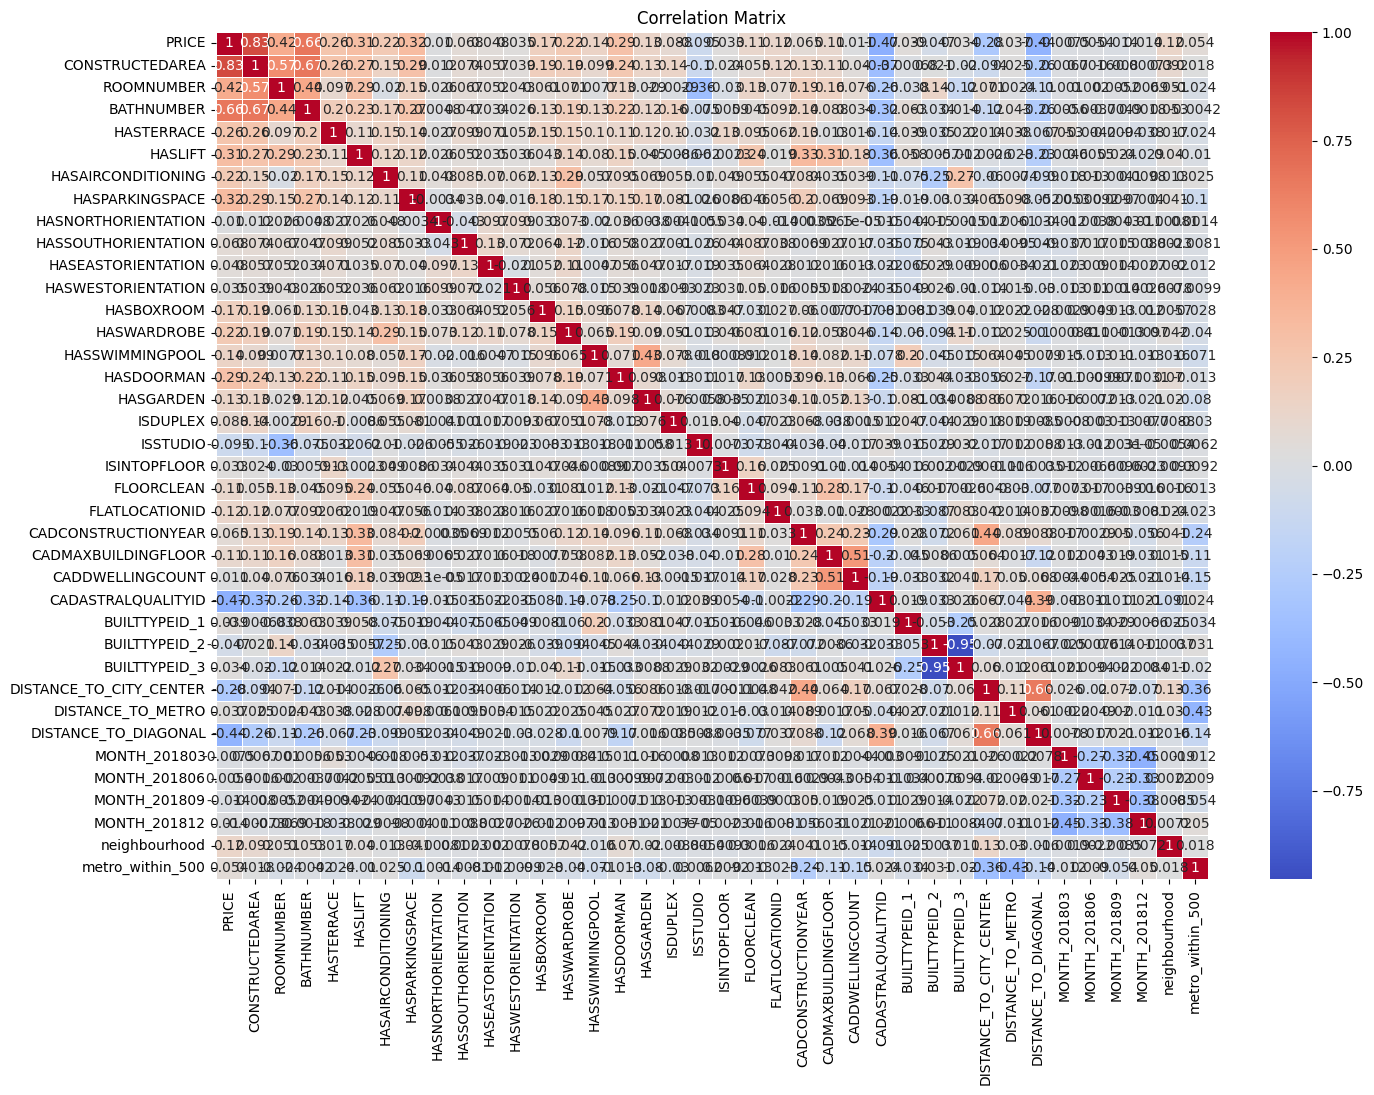

In [264]:
barcelona = df_Barcelona.drop(columns=['geometry', 'UNITPRICE', 'LATITUDE', 'LONGITUDE','AMENITYID','ASSETID' ])

#Change the column value of MONTH_201803, MONTH_201806, MONTH_201809, MONTH_201812 to 0 and 1
barcelona['MONTH_201803'] = barcelona['MONTH_201803'].astype('int')
barcelona['MONTH_201806'] = barcelona['MONTH_201806'].astype('int')
barcelona['MONTH_201809'] = barcelona['MONTH_201809'].astype('int')
barcelona['MONTH_201812'] = barcelona['MONTH_201812'].astype('int')

# Encode the location names (label encoding)
barcelona['neighbourhood'] = df_Barcelona['neighbourhood'].astype('category').cat.codes

plt.figure(figsize=(16, 11))
correlation_barcelona = barcelona.corr()
sns.heatmap(correlation_barcelona, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [265]:
# print list of columns from correlation matrix in decreasing order of correlation with Price
correlation_barcelona['PRICE'].sort_values(ascending=False)

PRICE                      1.000000
CONSTRUCTEDAREA            0.830097
BATHNUMBER                 0.664353
ROOMNUMBER                 0.417170
HASPARKINGSPACE            0.320969
HASLIFT                    0.311066
HASDOORMAN                 0.287323
HASTERRACE                 0.264101
HASAIRCONDITIONING         0.223072
HASWARDROBE                0.222818
HASBOXROOM                 0.170977
HASSWIMMINGPOOL            0.144228
HASGARDEN                  0.133106
neighbourhood              0.122891
FLATLOCATIONID             0.119498
FLOORCLEAN                 0.109662
CADMAXBUILDINGFLOOR        0.105369
ISDUPLEX                   0.087689
HASSOUTHORIENTATION        0.067551
CADCONSTRUCTIONYEAR        0.065409
metro_within_500           0.053763
HASEASTORIENTATION         0.047725
BUILTTYPEID_1              0.039248
DISTANCE_TO_METRO          0.036677
HASWESTORIENTATION         0.035419
BUILTTYPEID_3              0.034294
ISINTOPFLOOR               0.033165
MONTH_201812               0

**Drop columns where correlation_matrix['PRICE'] absolute value is less than 0.07**

In [266]:
# Identify columns where absolute correlation with 'PRICE' is less than 0.07
low_corr_columns = correlation_barcelona['PRICE'][abs(correlation_barcelona['PRICE']) < 0.07].index

# Drop the identified columns from the DataFrame
barcelona_filtered = barcelona.drop(columns=low_corr_columns)

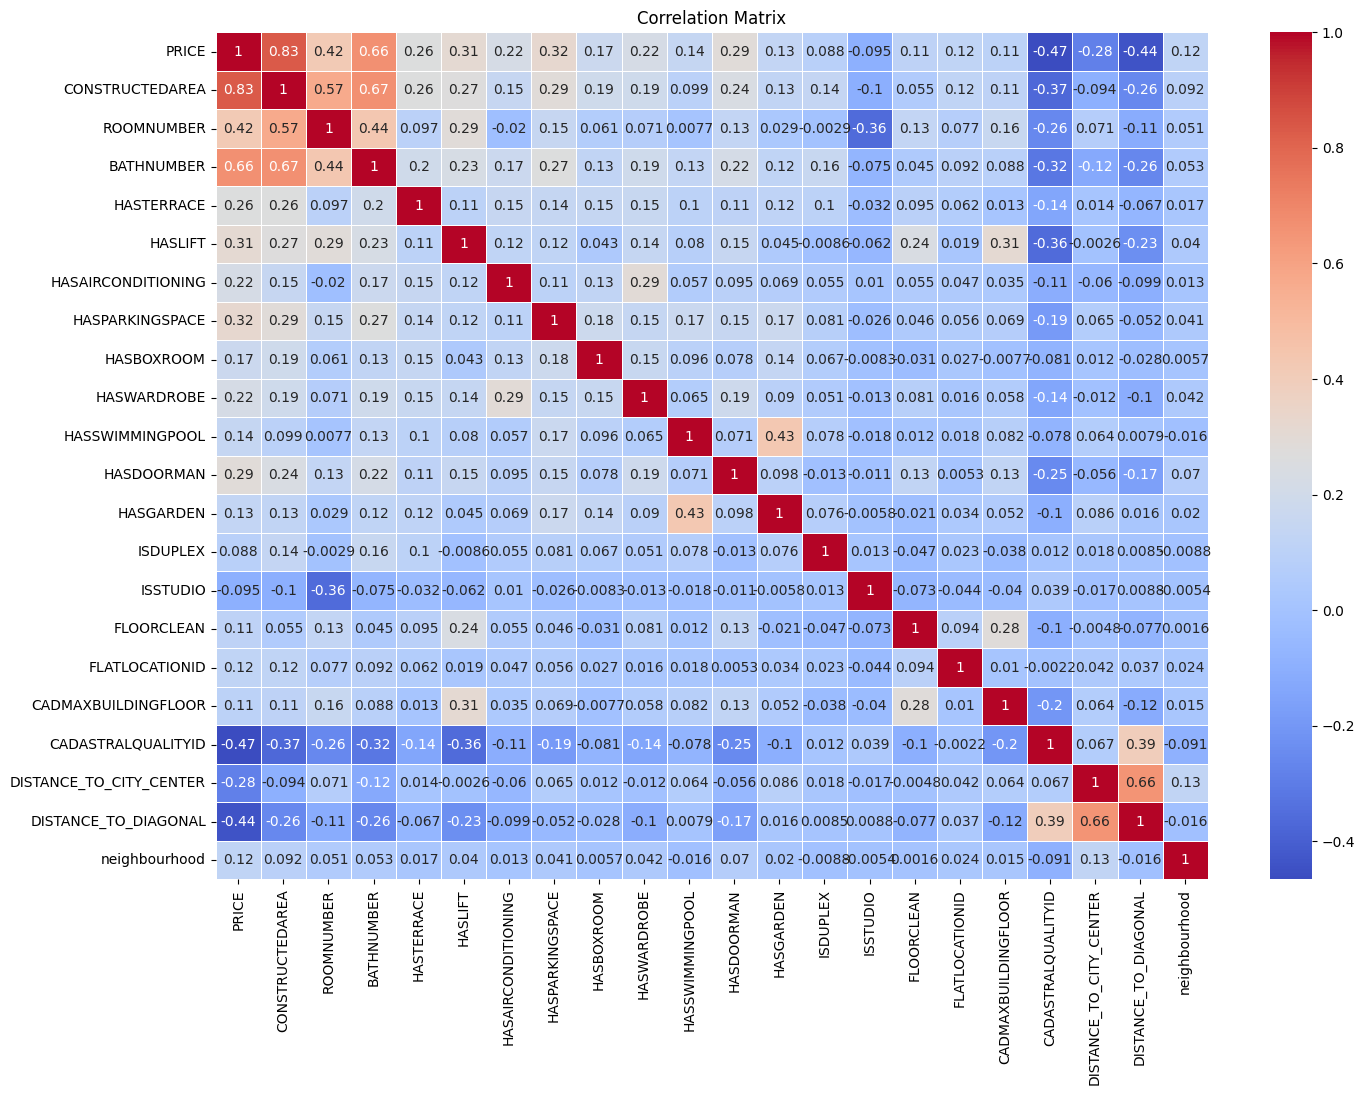

In [267]:
plt.figure(figsize=(16, 11))
correlation_barcelona = barcelona_filtered.corr()
sns.heatmap(correlation_barcelona, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [268]:
# print list of columns from correlation matrix in decreasing order of correlation with Price
correlation_barcelona['PRICE'].sort_values(ascending=False)

PRICE                      1.000000
CONSTRUCTEDAREA            0.830097
BATHNUMBER                 0.664353
ROOMNUMBER                 0.417170
HASPARKINGSPACE            0.320969
HASLIFT                    0.311066
HASDOORMAN                 0.287323
HASTERRACE                 0.264101
HASAIRCONDITIONING         0.223072
HASWARDROBE                0.222818
HASBOXROOM                 0.170977
HASSWIMMINGPOOL            0.144228
HASGARDEN                  0.133106
neighbourhood              0.122891
FLATLOCATIONID             0.119498
FLOORCLEAN                 0.109662
CADMAXBUILDINGFLOOR        0.105369
ISDUPLEX                   0.087689
ISSTUDIO                  -0.095272
DISTANCE_TO_CITY_CENTER   -0.283768
DISTANCE_TO_DIAGONAL      -0.441809
CADASTRALQUALITYID        -0.465383
Name: PRICE, dtype: float64

As per the above table, we can see that the columns CONSTRUCTEDAREA, BATHNUMBER, ROOMNUMBER, HASPARKINGSPACE, DISTANCE_TO_DIAGONAL, CADASTRALQUALITYID, ISPARKINGSPACEINCLUDEDINPRICE, HASDOORMAN, HASLIFT, HASTERRACE are some of the columns that have a higher correlation with the PRICE of the asset listed.


<Figure size 1600x1100 with 0 Axes>

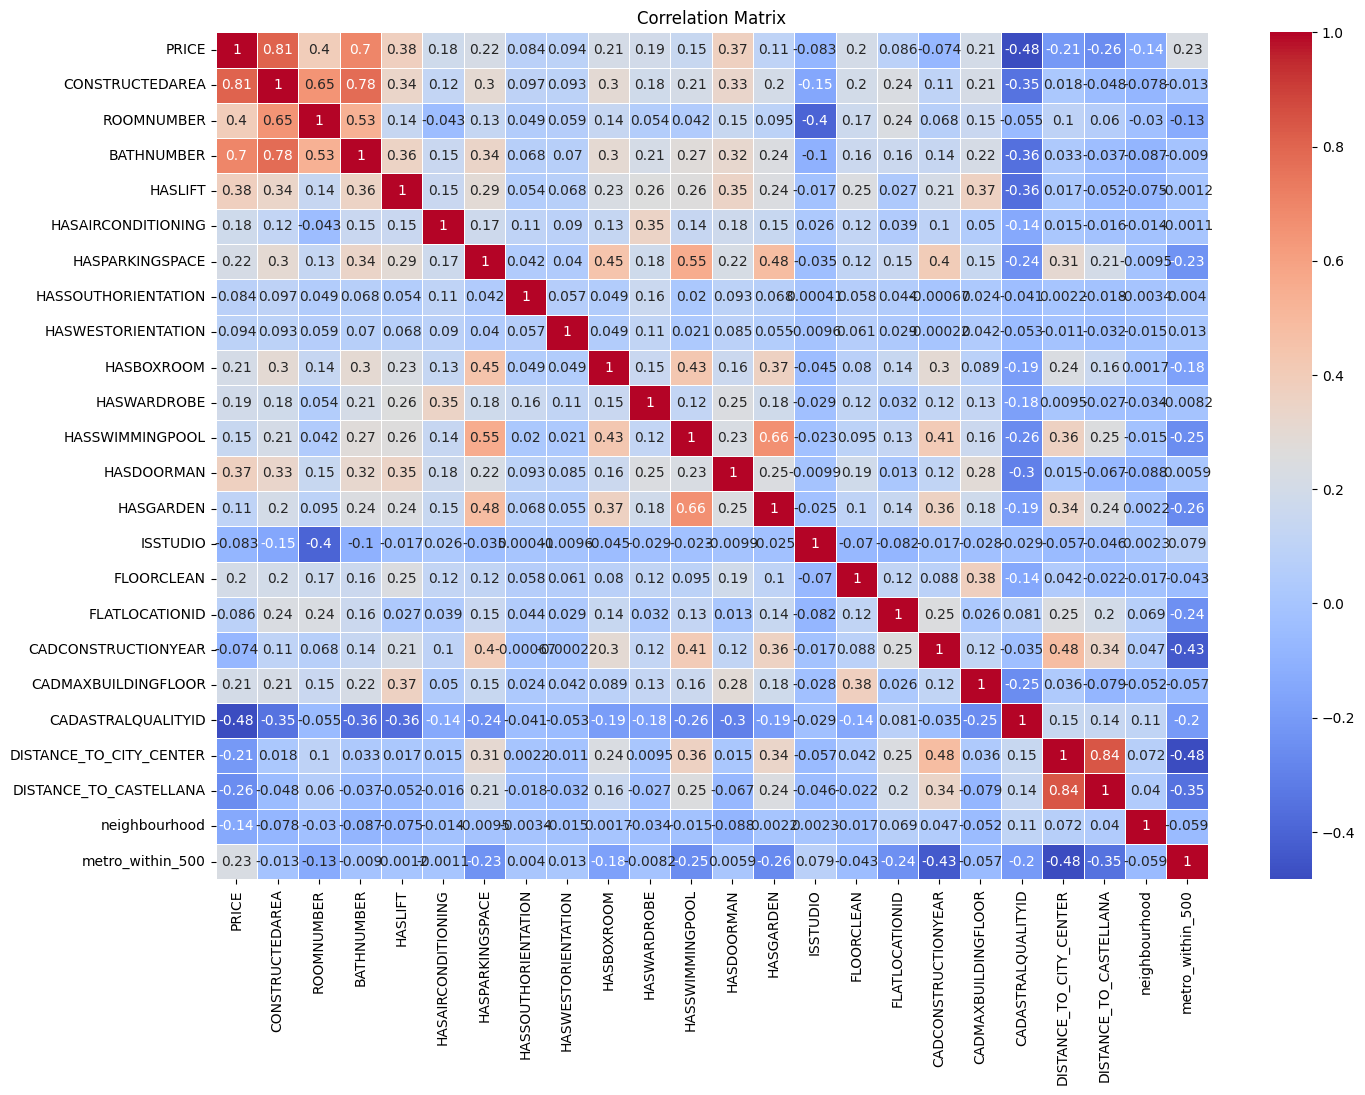

In [269]:
madrid = df_Madrid.drop(columns=['geometry', 'UNITPRICE', 'LATITUDE', 'LONGITUDE','AMENITYID','ASSETID' ])

#Change the column value of MONTH_201803, MONTH_201806, MONTH_201809, MONTH_201812 to 0 and 1
madrid['MONTH_201803'] = madrid['MONTH_201803'].astype('int')
madrid['MONTH_201806'] = madrid['MONTH_201806'].astype('int')
madrid['MONTH_201809'] = madrid['MONTH_201809'].astype('int')
madrid['MONTH_201812'] = madrid['MONTH_201812'].astype('int')

# Encode the location names (label encoding)
madrid['neighbourhood'] = df_Madrid['neighbourhood'].astype('category').cat.codes

plt.figure(figsize=(16, 11))
correlation_madrid = madrid.corr()

# Identify columns where absolute correlation with 'PRICE' is less than 0.07
low_corr_columns = correlation_madrid['PRICE'][abs(correlation_madrid['PRICE']) < 0.07].index

# Drop the identified columns from the DataFrame
madrid_filtered = madrid.drop(columns=low_corr_columns)

plt.figure(figsize=(16, 11))
correlation_madrid = madrid_filtered.corr()
sns.heatmap(correlation_madrid, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [270]:
# print list of columns from correlation matrix in decreasing order of correlation with Price
correlation_madrid['PRICE'].sort_values(ascending=False)

PRICE                      1.000000
CONSTRUCTEDAREA            0.805084
BATHNUMBER                 0.696176
ROOMNUMBER                 0.397415
HASLIFT                    0.378928
HASDOORMAN                 0.372053
metro_within_500           0.231686
HASPARKINGSPACE            0.217244
HASBOXROOM                 0.211254
CADMAXBUILDINGFLOOR        0.205502
FLOORCLEAN                 0.204170
HASWARDROBE                0.192037
HASAIRCONDITIONING         0.177917
HASSWIMMINGPOOL            0.146167
HASGARDEN                  0.106704
HASWESTORIENTATION         0.094296
FLATLOCATIONID             0.086096
HASSOUTHORIENTATION        0.083943
CADCONSTRUCTIONYEAR       -0.073686
ISSTUDIO                  -0.082844
neighbourhood             -0.138308
DISTANCE_TO_CITY_CENTER   -0.205840
DISTANCE_TO_CASTELLANA    -0.255234
CADASTRALQUALITYID        -0.482798
Name: PRICE, dtype: float64

As per the above table, in Madrid,, we can see that the columns CONSTRUCTEDAREA, BATHNUMBER, ROOMNUMBER, HASDOORMAN, HASLIFT, HASPARKINGSPACE, metro_within_500 m, FloorClean are some of the columns that have a higher correlation with the PRICE of the asset listed.

<Figure size 1600x1100 with 0 Axes>

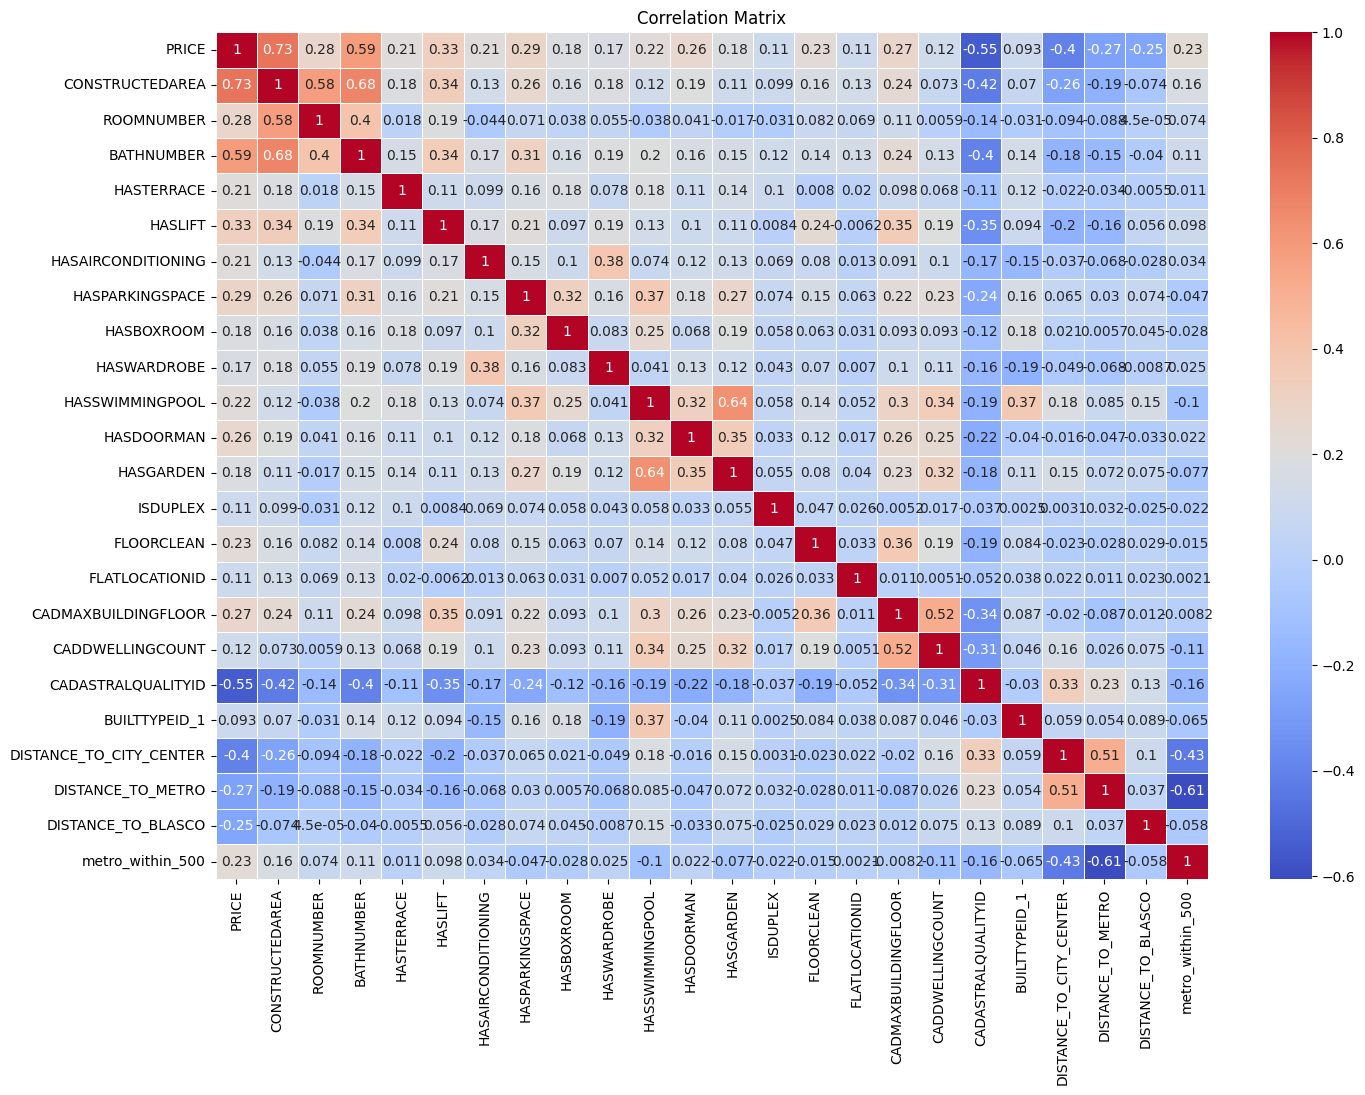

In [271]:
valencia = df_Valencia.drop(columns=['geometry', 'UNITPRICE', 'LATITUDE', 'LONGITUDE','AMENITYID','ASSETID' ])

#Change the column value of MONTH_201803, MONTH_201806, MONTH_201809, MONTH_201812 to 0 and 1
valencia['MONTH_201803'] = valencia['MONTH_201803'].astype('int')
valencia['MONTH_201806'] = valencia['MONTH_201806'].astype('int')
valencia['MONTH_201809'] = valencia['MONTH_201809'].astype('int')
valencia['MONTH_201812'] = valencia['MONTH_201812'].astype('int')

# Encode the location names (label encoding)
valencia['neighbourhood'] = df_Valencia['neighbourhood'].astype('category').cat.codes

plt.figure(figsize=(16, 11))
correlation_valencia = valencia.corr()

# Identify columns where absolute correlation with 'PRICE' is less than 0.07
low_corr_columns = correlation_valencia['PRICE'][abs(correlation_valencia['PRICE']) < 0.07].index

# Drop the identified columns from the DataFrame
valencia_filtered = valencia.drop(columns=low_corr_columns)

plt.figure(figsize=(16, 11))
correlation_valencia = valencia_filtered.corr()
sns.heatmap(correlation_valencia, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [272]:
# print list of columns from correlation matrix in decreasing order of correlation with Price
correlation_valencia['PRICE'].sort_values(ascending=False)

PRICE                      1.000000
CONSTRUCTEDAREA            0.731323
BATHNUMBER                 0.592054
HASLIFT                    0.325090
HASPARKINGSPACE            0.289700
ROOMNUMBER                 0.275823
CADMAXBUILDINGFLOOR        0.272661
HASDOORMAN                 0.262769
metro_within_500           0.233405
FLOORCLEAN                 0.226568
HASSWIMMINGPOOL            0.219410
HASTERRACE                 0.212158
HASAIRCONDITIONING         0.210866
HASBOXROOM                 0.181049
HASGARDEN                  0.179111
HASWARDROBE                0.169775
CADDWELLINGCOUNT           0.119420
FLATLOCATIONID             0.107701
ISDUPLEX                   0.106207
BUILTTYPEID_1              0.092860
DISTANCE_TO_BLASCO        -0.251451
DISTANCE_TO_METRO         -0.271073
DISTANCE_TO_CITY_CENTER   -0.400389
CADASTRALQUALITYID        -0.548140
Name: PRICE, dtype: float64

As per the above table, in Valencia, we can see that the columns CONSTRUCTEDAREA, BATHNUMBER, ROOMNUMBER, HASDOORMAN, HASLIFT, HASPARKINGSPACE, metro_within_500 m, CadMaxBuildingFloor are some of the columns that have a higher correlation with the PRICE of the asset listed.

**Analysing the pricing of assets based on location**

In [273]:
# Calculate average price by neighbourhood
average_prices = barcelona.groupby('neighbourhood')['PRICE'].mean().reset_index()

In [274]:
#Map the neighbourhoods to their respective names
neighbourhood_map = dict(zip(barcelona['neighbourhood'], df_Barcelona['neighbourhood']))
average_prices['neighbourhood'] = average_prices['neighbourhood'].map(neighbourhood_map)

In [275]:
#Divide average price by 1000 for better readability
average_prices['PRICE'] = average_prices['PRICE'] / 1000

As we see below, the neighbourhoods with the highest average asset prices are: Pedralbes, Tres Torres, and Sant Gervasi - Galvany. So the asset to be listed in/around these areas can have a high asking price (around 1000k).
Places such as Les Roquestes, La Trinitat Nova or Torre Baro- Vallbona have the lowest average asset prices. So the asset to be listed in/around these areas can have a low asking price (around 150k).

C:\Users\User\AppData\Local\Temp\ipykernel_13736\1913638413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRICE', y='neighbourhood', data=average_prices, palette='viridis')


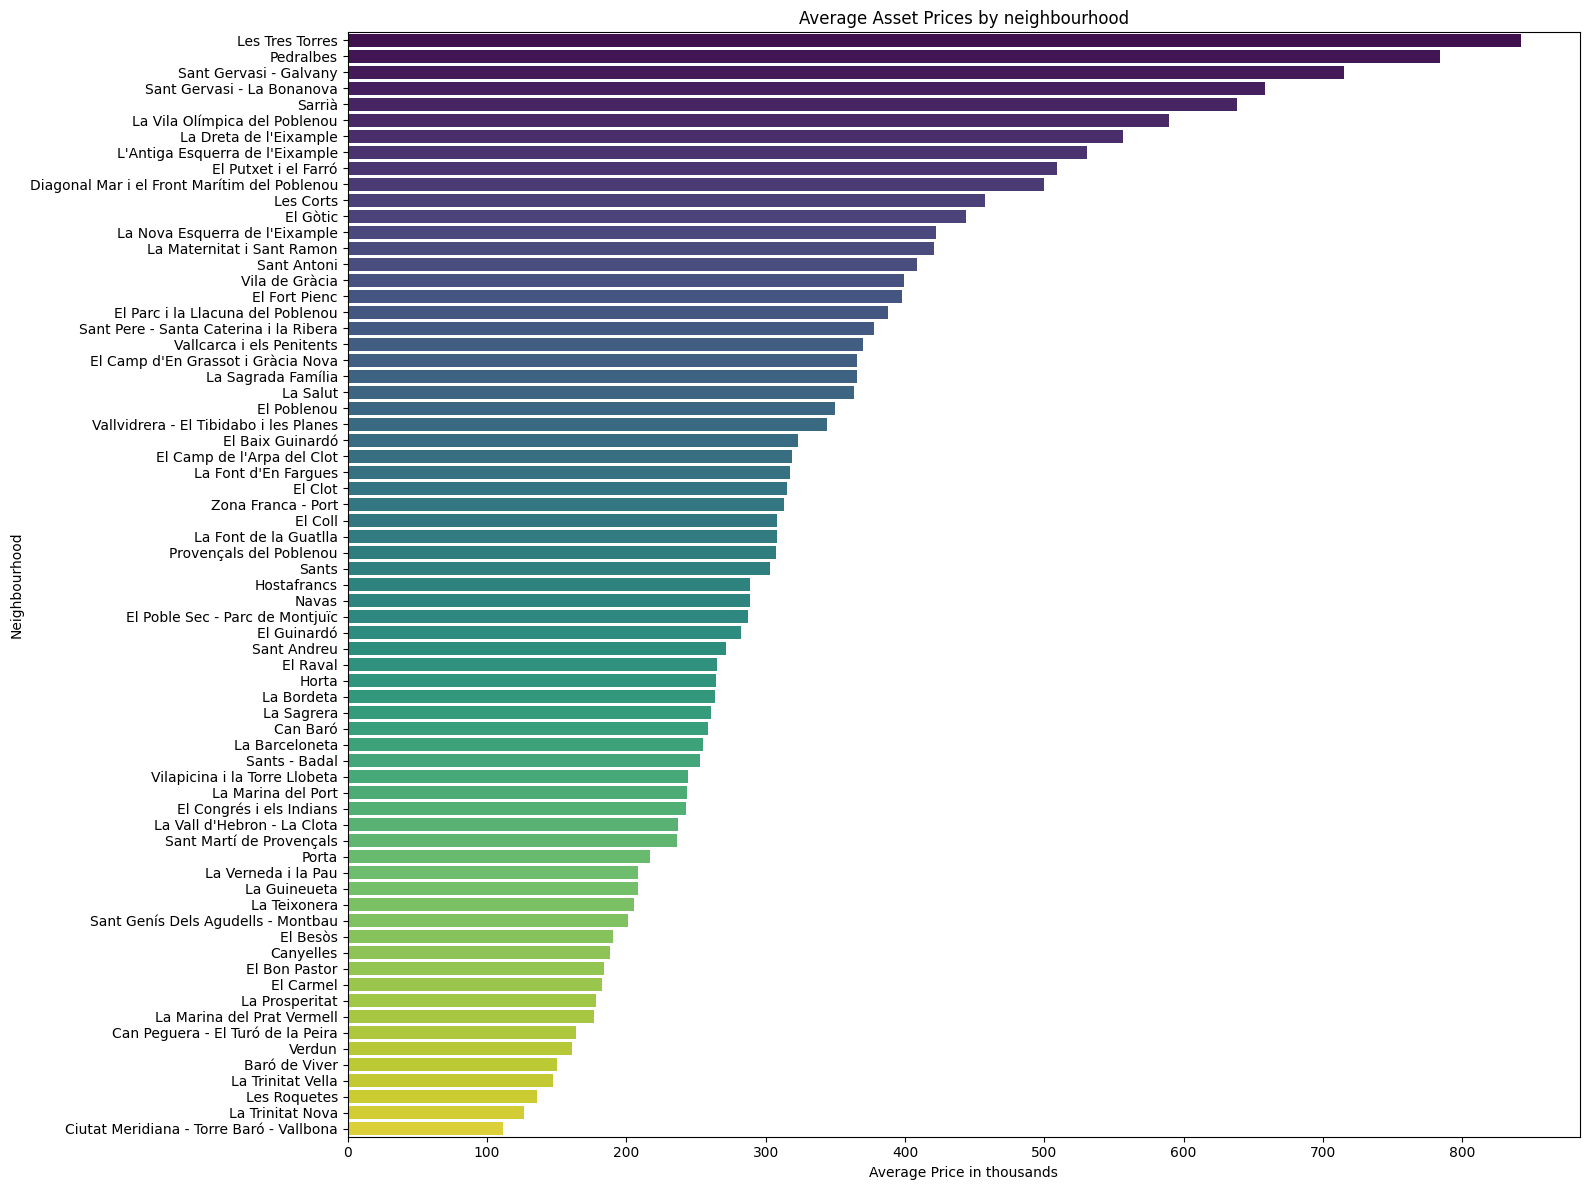

In [276]:
# Sort the neighbourhoods by average price in descending order
average_prices = average_prices.sort_values(by='PRICE', ascending=False)

# Plot the average prices by neighbourhood
plt.figure(figsize=(16, 12))
sns.barplot(x='PRICE', y='neighbourhood', data=average_prices, palette='viridis')

plt.title('Average Asset Prices by neighbourhood')
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price in thousands')
plt.tight_layout()

# Show the plot
plt.show()


For standardized pricing for an asset, using the average of unit price (price per meter square) in each neighborhood.

C:\Users\User\AppData\Local\Temp\ipykernel_13736\3111399456.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UNITPRICE', y='neighbourhood', data=average_prices, palette='viridis')


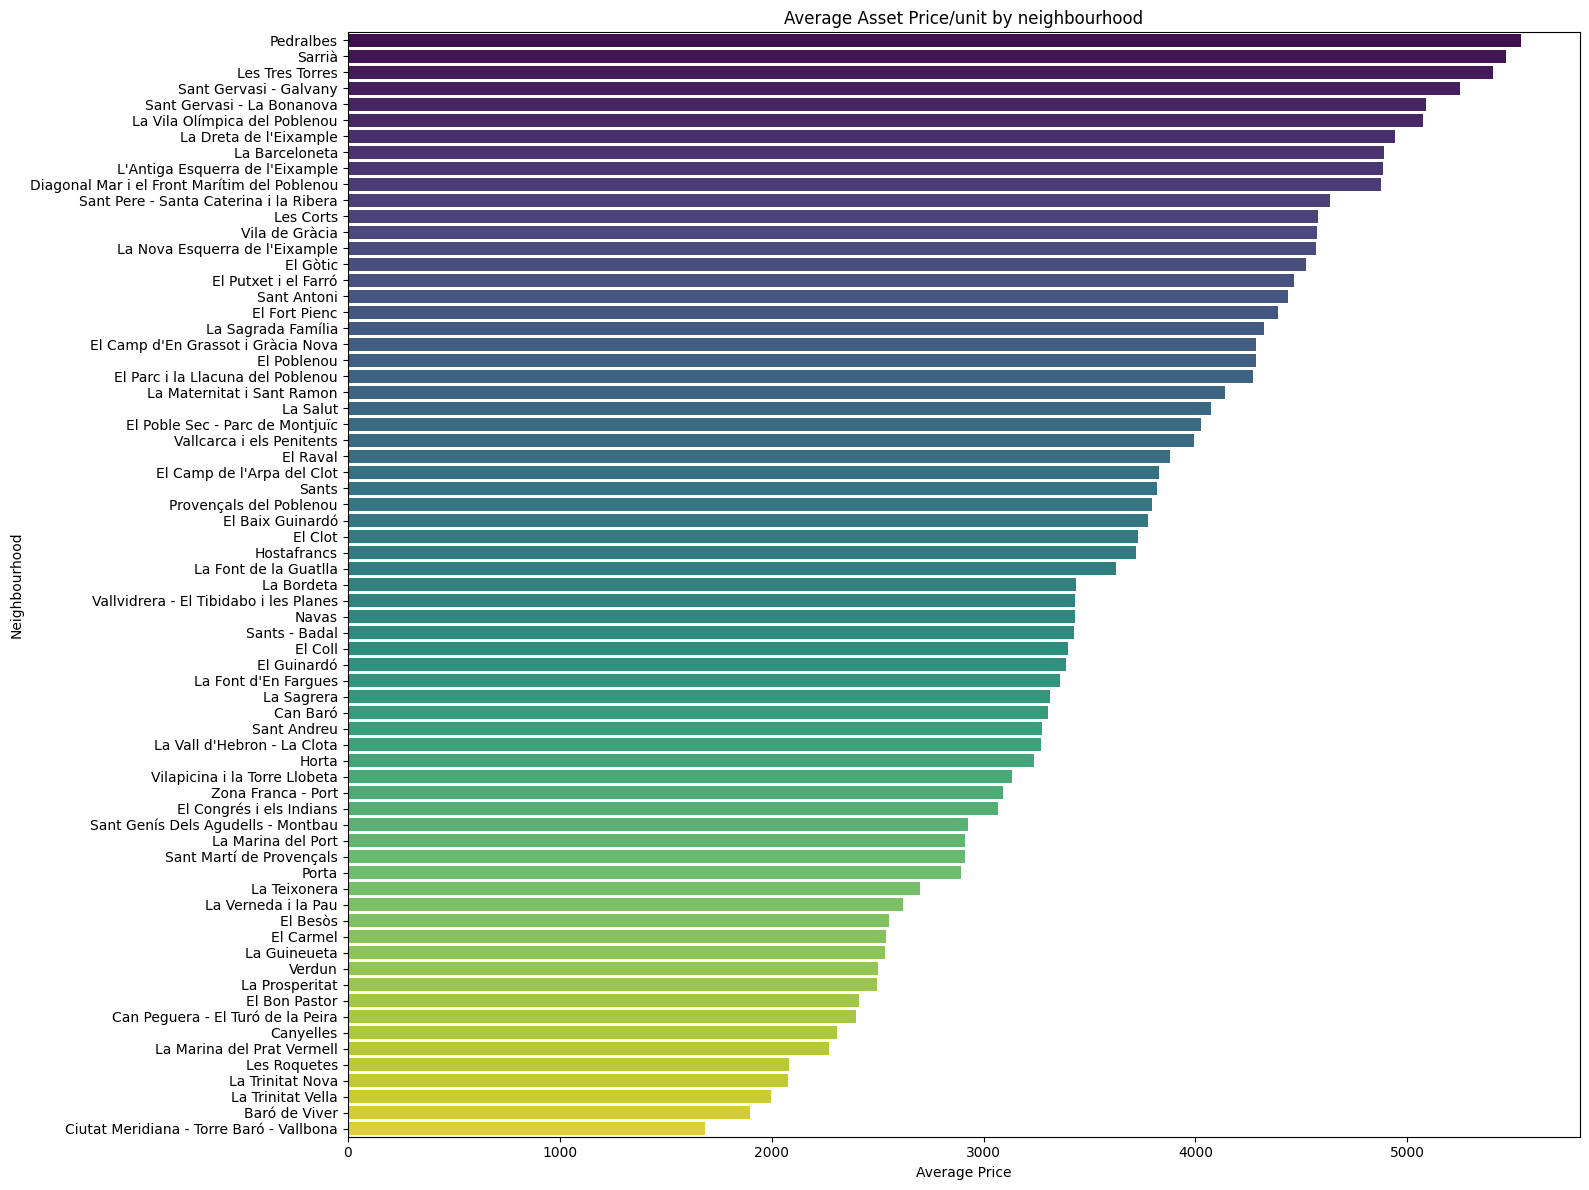

In [277]:
barcelona_unit = df_Barcelona.copy()
# Encode the location names (label encoding)
barcelona_unit['neighbourhood'] = df_Barcelona['neighbourhood'].astype('category').cat.codes

# Calculate average price by neighbourhood
average_prices = barcelona_unit.groupby('neighbourhood')['UNITPRICE'].mean().reset_index()

#Map the neighbourhoods to their respective names
neighbourhood_map = dict(zip(barcelona_unit['neighbourhood'], df_Barcelona['neighbourhood']))
average_prices['neighbourhood'] = average_prices['neighbourhood'].map(neighbourhood_map)

# Sort the neighbourhoods by average price in descending order
average_prices = average_prices.sort_values(by='UNITPRICE', ascending=False)

# Plot the average prices by neighbourhood
plt.figure(figsize=(16, 12))
sns.barplot(x='UNITPRICE', y='neighbourhood', data=average_prices, palette='viridis')

plt.title('Average Asset Price/unit by neighbourhood')
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price')
plt.tight_layout()

# Show the plot
plt.show()

As we see above, the neighbourhoods with the highest average asset unit prices (price per meter square) are: Pedralbes, Sarria, Tres Torres, and Sant Gervasi - Galvany. So the asset to be listed in/around these areas can have a high asking price (around 5000/m2).
Places such as Les Roquestes, La Trinitat Vella, Baro de Viver or Torre Baro- Vallbona have the lowest average asset prices. So the asset to be listed in/around these areas can have a low asking price (around 1800/m2).

C:\Users\User\AppData\Local\Temp\ipykernel_13736\2477281657.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UNITPRICE', y='neighbourhood', data=average_prices, palette='viridis')


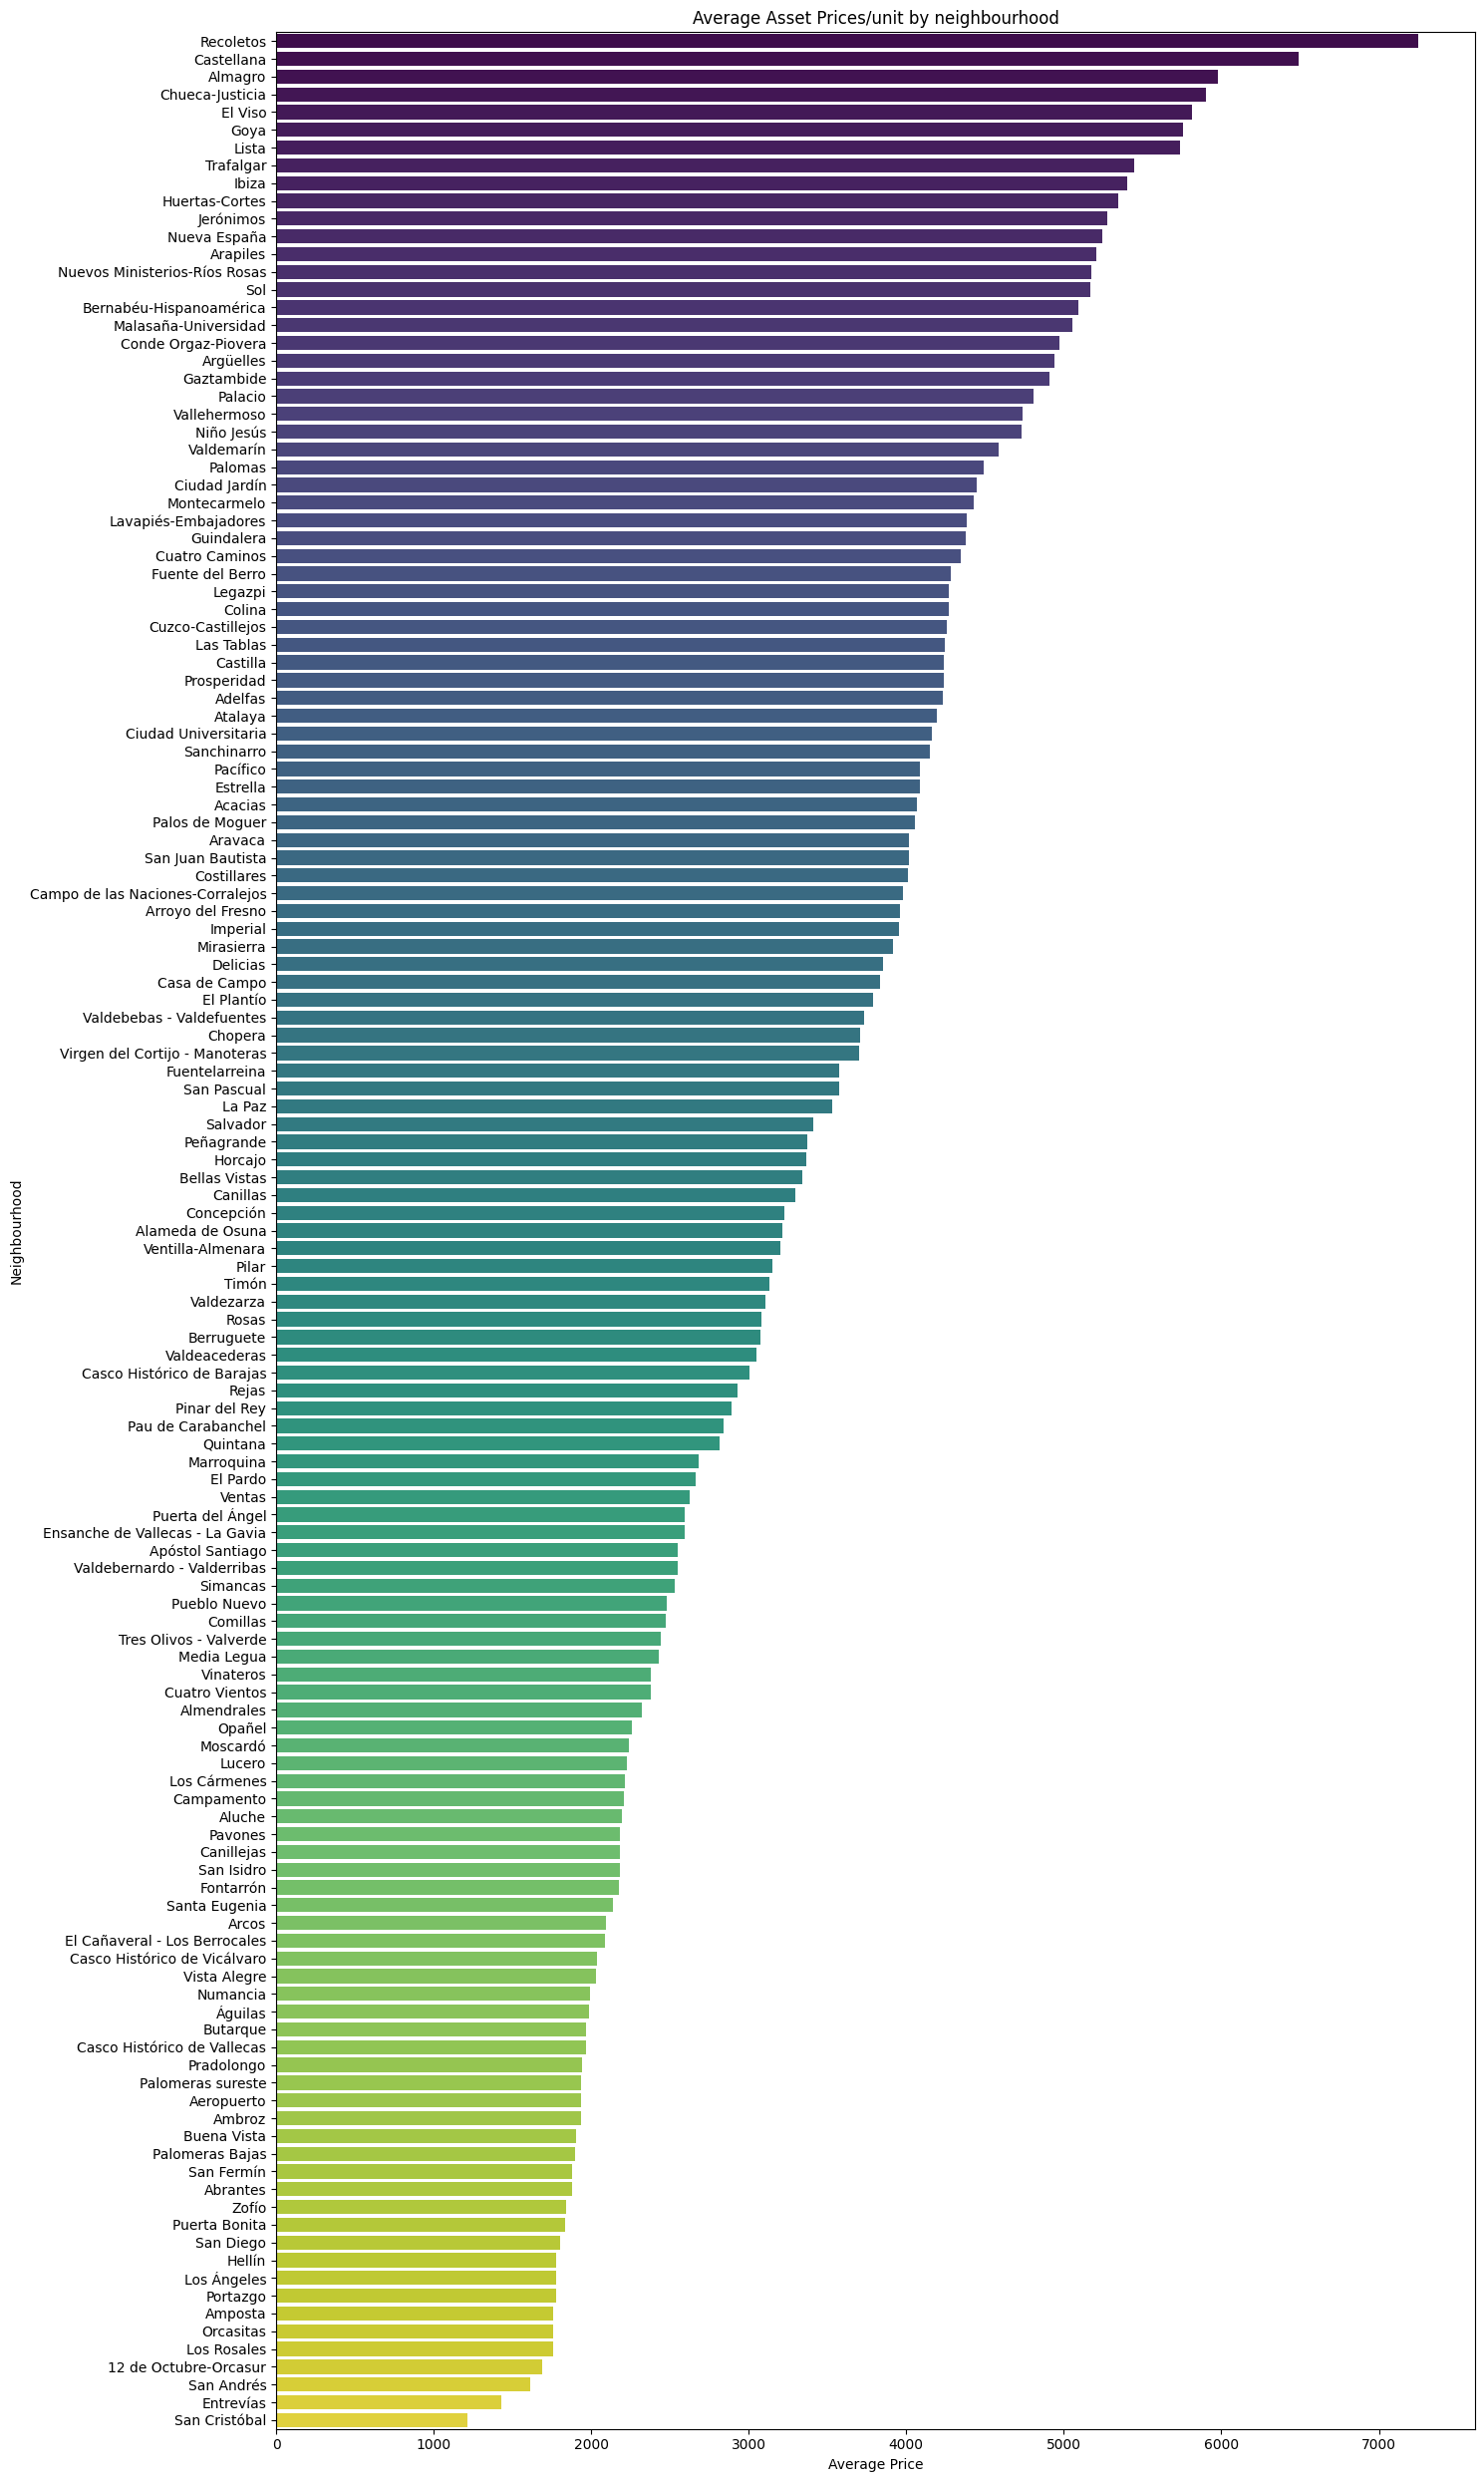

In [278]:
madrid_unit = df_Madrid.copy()
# Encode the location names (label encoding)
madrid_unit['neighbourhood'] = df_Madrid['neighbourhood'].astype('category').cat.codes

# Calculate average price by neighbourhood
average_prices = madrid_unit.groupby('neighbourhood')['UNITPRICE'].mean().reset_index()

#Map the neighbourhoods to their respective names
neighbourhood_map = dict(zip(madrid_unit['neighbourhood'], df_Madrid['neighbourhood']))
average_prices['neighbourhood'] = average_prices['neighbourhood'].map(neighbourhood_map)

# Sort the neighbourhoods by average price in descending order
average_prices = average_prices.sort_values(by='UNITPRICE', ascending=False)

# Plot the average prices by neighbourhood
plt.figure(figsize=(15, 25))
sns.barplot(x='UNITPRICE', y='neighbourhood', data=average_prices, palette='viridis')

plt.title('Average Asset Prices/unit by neighbourhood')
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price')
plt.tight_layout()

# Show the plot
plt.show()

As we see above, in Madrid, the neighbourhoods with the highest average asset unit prices (price per meter square) are: Recoletos, Castellana, Almagro, and Chueca. So the asset to be listed in/around these areas can have a high asking price (around 6500/m2). Places such as San Andres, Entrevias or San Cristobal have the lowest average asset prices. So the asset to be listed in/around these areas can have a low asking price (around 1300/m2).

C:\Users\User\AppData\Local\Temp\ipykernel_13736\48599224.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UNITPRICE', y='neighbourhood', data=average_prices, palette='viridis')


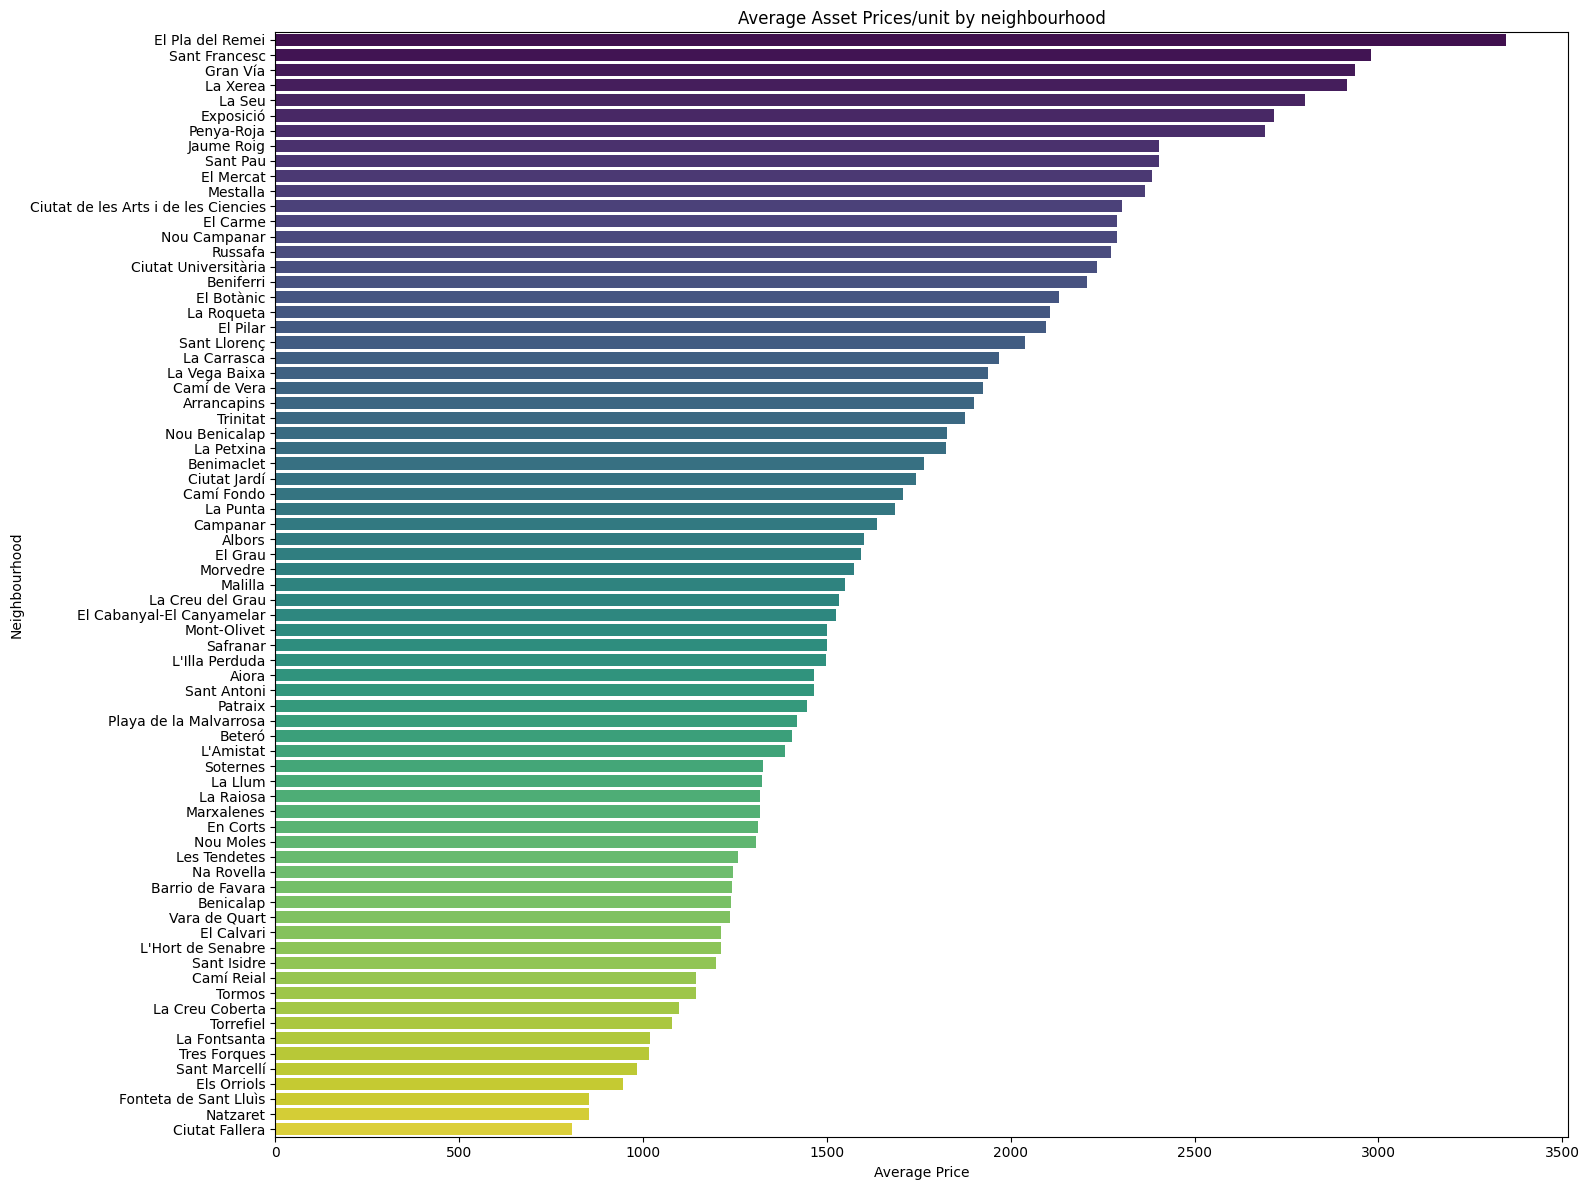

In [279]:
valencia_unit = df_Valencia.copy()
# Encode the location names (label encoding)
valencia_unit['neighbourhood'] = df_Valencia['neighbourhood'].astype('category').cat.codes

# Calculate average price by neighbourhood
average_prices = valencia_unit.groupby('neighbourhood')['UNITPRICE'].mean().reset_index()

#Map the neighbourhoods to their respective names
neighbourhood_map = dict(zip(valencia_unit['neighbourhood'], df_Valencia['neighbourhood']))
average_prices['neighbourhood'] = average_prices['neighbourhood'].map(neighbourhood_map)

# Sort the neighbourhoods by average price in descending order
average_prices = average_prices.sort_values(by='UNITPRICE', ascending=False)

# Plot the average prices by neighbourhood
plt.figure(figsize=(16, 12))
sns.barplot(x='UNITPRICE', y='neighbourhood', data=average_prices, palette='viridis')

plt.title('Average Asset Prices/unit by neighbourhood')
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price')
plt.tight_layout()

# Show the plot
plt.show()

As we see above, in Valencia, the neighbourhoods with the highest average asset unit prices (price per meter square) are: El Pla del Remei, La Xerea, Gran Via, and Sant Francesc. So the asset to be listed in/around these areas can have a high asking price (around 3000/m2). Places such as Natzaret, Fonteta de Sant Lluis or Ciutat Fallera have the lowest average asset prices. So the asset to be listed in/around these areas can have a low asking price (around 800/m2).

## ML Models

In [280]:
df_Barcelona['PRICE'] = df_Barcelona['PRICE'].apply(lambda x: np.log(x) if x > 0 else 0)
df_Madrid['PRICE'] = df_Madrid['PRICE'].apply(lambda x: np.log(x) if x > 0 else 0)
df_Valencia['PRICE'] = df_Valencia['PRICE'].apply(lambda x: np.log(x) if x > 0 else 0)

In [281]:
def target_encode(df, target_col, cat_col):
    target_mean = df.groupby(cat_col)[target_col].mean()
    return df[cat_col].map(target_mean)

df_Barcelona['NEIGHBOURHOOD_ENCODED'] = target_encode(df_Barcelona, 'PRICE', 'neighbourhood')
df_Madrid['NEIGHBOURHOOD_ENCODED'] = target_encode(df_Madrid, 'PRICE', 'neighbourhood')
df_Valencia['NEIGHBOURHOOD_ENCODED'] = target_encode(df_Valencia, 'PRICE', 'neighbourhood')

df_Barcelona.dropna(inplace=True)
df_Madrid.dropna(inplace=True)
df_Valencia.dropna(inplace=True)

In [282]:
df_Barcelona.head()

ASSETID      PRICE    UNITPRICE  CONSTRUCTEDAREA  \
0   A11898131848556022319  12.685408  3845.238095               84   
4   A12978912200216838006  12.980800  3909.909910              111   
12    A562616855841313407  13.918969  5776.041667              192   
14   A2669047332835598629  13.104199  5010.204082               98   
18  A17484290359262902262  12.923912  4823.529412               85   

    ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  \
0            4           1           1        1                   1   
4            4           2           1        1                   1   
12           3           3           1        1                   1   
14           3           2           0        1                   1   
18           3           2           0        1                   1   

    AMENITYID  HASPARKINGSPACE  HASNORTHORIENTATION  HASSOUTHORIENTATION  \
0           3                0                    0                    0   
4           3                0                    0                    0   
12          2                0                    0                    1   
14          3                0                    0                    0   
18          3                0                    0                    0   

    HASEASTORIENTATION  HASWESTORIENTATION  HASBOXROOM  HASWARDROBE  \
0                    0                   0           0            0   
4                    0                   0           0            0   
12                   0                   0           0            1   
14                   0                   0           0            0   
18                   1                   0           0            0   

    HASSWIMMINGPOOL  HASDOORMAN  HASGARDEN  ISDUPLEX  ISSTUDIO  ISINTOPFLOOR  \
0                 0           0          0         0         0             0   
4                 0           0          0         0         0             0   
12                0           0          0         0         0             0   
14                0           0          0         0         0             0   
18                0           1          0         0         0             0   

    FLOORCLEAN  FLATLOCATIONID  CADCONSTRUCTIONYEAR  CADMAXBUILDINGFLOOR  \
0          4.0             1.0                 1972                    9   
4          2.0             1.0                 1970                    8   
12         0.0             1.0                 1980                    4   
14         1.0             1.0                 1972                   10   
18         1.0             1.0                 1970                   10   

    CADDWELLINGCOUNT  CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  \
0                 13                   4              0              0   
4                 60                   2              0              0   
12                10                   3              0              0   
14                32                   3              0              0   
18                32                   3              0              0   

    BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
0               1                 1.876290           0.354004   
4               1                 2.333066           0.101568   
12              1                 0.574150           0.196765   
14              1                 2.177991           0.076963   
18              1                 2.262351           0.148700   

    DISTANCE_TO_DIAGONAL  LONGITUDE   LATITUDE  \
0               1.475264   2.149566  41.380027   
4               1.200265   2.143230  41.381076   
12              0.713400   2.167898  41.391870   
14              0.854869   2.144169  41.384491   
18              0.858770   2.143185  41.384292   

                             geometry  MONTH_201803  MONTH_201806  \
0   2.14956619166374|41.3800265682207          True         False   
4   2.14323019628654|41.3810759548507          True         False   
12  

In [283]:
columns_to_drop = ['ASSETID', 'LONGITUDE', 'LATITUDE', 'MONTH_201803', 'MONTH_201806', 'MONTH_201809', 'MONTH_201812', 'neighbourhood', 'geometry','UNITPRICE','HASSOUTHORIENTATION','HASEASTORIENTATION','HASWESTORIENTATION','ISINTOPFLOOR']

df_Barcelona = df_Barcelona.drop(columns=columns_to_drop)

df_Madrid = df_Madrid.drop(columns=columns_to_drop)

df_Valencia = df_Valencia.drop(columns=columns_to_drop)

In [284]:
df_Barcelona.head()

PRICE  CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  \
0   12.685408               84           4           1           1        1   
4   12.980800              111           4           2           1        1   
12  13.918969              192           3           3           1        1   
14  13.104199               98           3           2           0        1   
18  12.923912               85           3           2           0        1   

    HASAIRCONDITIONING  AMENITYID  HASPARKINGSPACE  HASNORTHORIENTATION  \
0                    1          3                0                    0   
4                    1          3                0                    0   
12                   1          2                0                    0   
14                   1          3                0                    0   
18                   1          3                0                    0   

    HASBOXROOM  HASWARDROBE  HASSWIMMINGPOOL  HASDOORMAN  HASGARDEN  ISDUPLEX  \
0            0            0                0           0          0         0   
4            0            0                0           0          0         0   
12           0            1                0           0          0         0   
14           0            0                0           0          0         0   
18           0            0                0           1          0         0   

    ISSTUDIO  FLOORCLEAN  FLATLOCATIONID  CADCONSTRUCTIONYEAR  \
0          0         4.0             1.0                 1972   
4          0         2.0             1.0                 1970   
12         0         0.0             1.0                 1980   
14         0         1.0             1.0                 1972   
18         0         1.0             1.0                 1970   

    CADMAXBUILDINGFLOOR  CADDWELLINGCOUNT  CADASTRALQUALITYID  BUILTTYPEID_1  \
0                     9                13                   4              0   
4                     8                60                   2              0   
12                    4                10                   3              0   
14                   10                32                   3              0   
18                   10                32                   3              0   

    BUILTTYPEID_2  BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
0               0              1                 1.876290           0.354004   
4               0              1                 2.333066           0.101568   
12              0              1                 0.574150           0.196765   
14              0              1                 2.177991           0.076963   
18              0              1                 2.262351           0.148700   

    DISTANCE_TO_DIAGONAL  metro_within_500  NEIGHBOURHOOD_ENCODED  
0               1.475264                11              12.903125  
4               1.200265                15              12.903125  
12              0.713400                19              13.110030  
14              0.854869                 8              12.903125  
18              0.858770                 8              12.903125

In [285]:
'''
columns_to_keep = [
    'PRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE',
    'HASLIFT', 'HASAIRCONDITIONING', 'HASSWIMMINGPOOL', 'ISSTUDIO',
    'ISINTOPFLOOR', 'HASPARKINGSPACE', 'DISTANCE_TO_CITY_CENTER',
    'DISTANCE_TO_METRO','NEIGHBOURHOOD_ENCODED','metro_within_500'
]

df_Barcelona = df_Barcelona[columns_to_keep]
df_Madrid = df_Madrid[columns_to_keep]
df_Valencia = df_Valencia[columns_to_keep]
'''

"\ncolumns_to_keep = [\n    'PRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE',\n    'HASLIFT', 'HASAIRCONDITIONING', 'HASSWIMMINGPOOL', 'ISSTUDIO',\n    'ISINTOPFLOOR', 'HASPARKINGSPACE', 'DISTANCE_TO_CITY_CENTER',\n    'DISTANCE_TO_METRO','NEIGHBOURHOOD_ENCODED','metro_within_500'\n]\n\ndf_Barcelona = df_Barcelona[columns_to_keep]\ndf_Madrid = df_Madrid[columns_to_keep]\ndf_Valencia = df_Valencia[columns_to_keep]\n"

In [286]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
import statsmodels.api as sm

X = df_Barcelona.drop(['PRICE'], axis=1)
y = df_Barcelona['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model_sm = sm.OLS(y_train, X_train_sm).fit()

y_pred = model_sm.predict(X_test_sm)

mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae}')
print(f'MDAE: {mdae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

print(model_sm.summary())

MAE: 0.16342605101995836
MDAE: 0.13104453093658464
RMSE: 0.21497077253708072
MAPE: 1.2970843664749268%
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     6147.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:52:18   Log-Likelihood:                 4673.9
No. Observations:               36104   AIC:                            -9288.
Df Residuals:                   36074   BIC:                            -9033.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------

Fitting 5 folds for each of 162 candidates, totalling 810 fits
MAE: 0.11531595178606141
MDAE: 0.0790316407326177
RMSE: 0.16485431408824305
MAPE: 0.9161112572183433%
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
                    Feature  Importance
0           CONSTRUCTEDAREA    0.618908
33    NEIGHBOURHOOD_ENCODED    0.192499
29  DISTANCE_TO_CITY_CENTER    0.025692
22      CADCONSTRUCTIONYEAR    0.018052
31     DISTANCE_TO_DIAGONAL    0.017939
20               FLOORCLEAN    0.016318
30        DISTANCE_TO_METRO    0.014591
2                BATHNUMBER    0.014589
24         CADDWELLINGCOUNT    0.011034
4                   HASLIFT    0.008555
32         metro_within_500    0.007956
1                ROOMNUMBER    0.007060
27            BUILTTYPEID_2    0.006911
23      CADMAXBUILDINGFLOOR    0.006771
25       CADASTRALQUALITYID    0.004976
5        HASAIRCONDITIONING    0.004858
3                HASTERRA

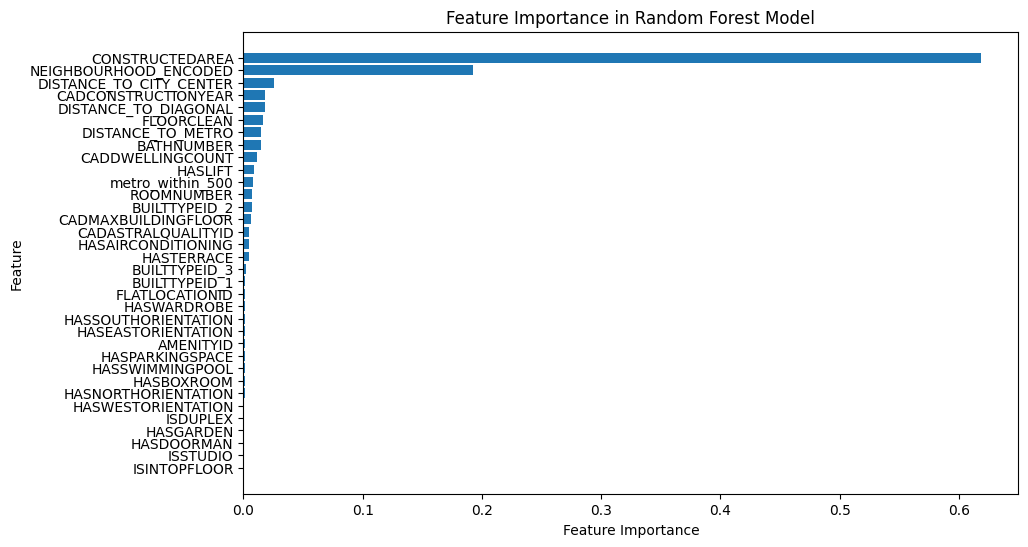

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae}')
print(f'MDAE: {mdae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

print(f'Best parameters found: {grid_search.best_params_}')

feature_importances = best_rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae}')
print(f'MDAE: {mdae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

print(f'Best parameters found: {grid_search.best_params_}')

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


MAE: 0.11357728456543496
MDAE: 0.08306807880904721
RMSE: 0.15843951980475932
MAPE: 0.9022131472068953%
Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 1.0}
